## Feat Engr X
* More Featuring and Combining Idea from Kaggle Kernels

**Atkins**

kaggle : https://www.kaggle.com/code/gcdatkin/top-10-house-price-regression-competition-nb/notebook

youtube : https://youtu.be/zwYHloLXH0c
    
**BarbosaFelipeB**

kaggle :https://www.kaggle.com/code/felipebezerrabarbosa/machine-learning-housing-prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
from IPython.display import display
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsRegressor
import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
pd.set_option('display.max_columns', None)

In [3]:
from dython.nominal import associations

In [4]:
train = pd.read_csv('train.csv')
print(train.shape)
train.head().T

(1460, 81)


,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450,9600,11250,9550,14260
...,...,...,...,...,...
MoSold,2,5,9,2,12
YrSold,2008,2007,2008,2006,2008
SaleType,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal


In [5]:
test = pd.read_csv('test.csv')
print(test.shape)
test.head().T

(1459, 80)


,0,1,2,3,4
Id,1461,1462,1463,1464,1465
MSSubClass,20,20,60,60,120
MSZoning,RH,RL,RL,RL,RL
LotFrontage,80.0,81.0,74.0,78.0,43.0
LotArea,11622,14267,13830,9978,5005
...,...,...,...,...,...
MiscVal,0,12500,0,0,0
MoSold,6,6,3,6,1
YrSold,2010,2010,2010,2010,2010
SaleType,WD,WD,WD,WD,WD


In [6]:
cats_train = train.select_dtypes(include='object').columns
cats_test = test.select_dtypes(include='object').columns
print('No of train cat_cols : ',len(cats_train))
print('No of test cat_cols : ',len(cats_test))

No of train cat_cols :  43
No of test cat_cols :  43


In [8]:
nums_train = train.select_dtypes(exclude='object').columns
nums_test = test.select_dtypes(exclude='object').columns
print('No of train cat_cols : ',len(nums_train))
print('No of test cat_cols : ',len(nums_test))

No of train cat_cols :  38
No of test cat_cols :  37


In [232]:
nums_train

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [28]:
nums_train

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [12]:
np.linspace(0,1,20)

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [8]:
base_cat=['Neighborhood', 'Exterior2nd', 'Exterior1st', 'BsmtFinType1',
       'FireplaceQu', 'GarageFinish', 'BsmtQual', 'KitchenQual', 'GarageType',
       'BsmtExposure', 'Foundation', 'HeatingQC', 'ExterQual', 'MasVnrType',
       'SaleCondition', 'MSZoning', 'SaleType']

In [76]:
base_con=['GrLivArea', '1stFlrSF', 'TotalBsmtSF', 'GarageArea',
       'BsmtFinSF1', 'YearBuilt', 'YearRemodAdd', 'OpenPorchSF', '2ndFlrSF',
       'WoodDeckSF', 'MasVnrArea']

base_num_cat = ['MSSubClass', 'OverallQual', 'TotRmsAbvGrd', 'GarageCars',
       'OverallCond', 'FullBath', 'Fireplaces', 'HalfBath']

In [30]:
#train.isna().sum()[train.select_dtypes(np.number).isna().sum() >0]
train_num_null = train[train.select_dtypes(np.number).columns].isna().sum()
#    missing = 
train_num_null[train_num_null>0].index.tolist()

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [ ]:
#GrLivArea 4000,1stFlrSF 2500 ,TotalBsmtSF 3000 ,GarageArea 1200

In [ ]:
        """
        #The Quality features
        
        features['TotalSF'] = (features['BsmtFinSF1'] + features['BsmtFinSF2'] +
                               features['1stFlrSF'] + features['2ndFlrSF'])
        features['TotalBathrooms'] = (features['FullBath'] +
                                      (0.5 * features['HalfBath']) +
                                      features['BsmtFullBath'] +
                                      (0.5 * features['BsmtHalfBath']))

        features['TotalPorchSF'] = (features['OpenPorchSF'] + features['3SsnPorch'] +
                                    features['EnclosedPorch'] +
                                    features['ScreenPorch'] + features['WoodDeckSF'])

        features['YearBlRm'] = (features['YearBuilt'] + features['YearRemodAdd'])

        # Merging quality and conditions.

        features['TotalExtQual'] = (features['ExterQual'] + features['ExterCond'])
        features['TotalBsmQual'] = (features['BsmtQual'] + features['BsmtCond'] +
                                    features['BsmtFinType1'] +
                                    features['BsmtFinType2'])
        features['TotalGrgQual'] = (features['GarageQual'] + features['GarageCond'])
        features['TotalQual'] = features['OverallQual'] + features[
            'TotalExtQual'] + features['TotalBsmQual'] + features[
                'TotalGrgQual'] + features['KitchenQual'] + features['HeatingQC']

        # Creating new features by using new quality indicators.

    
        features['QualGr'] = features['TotalQual'] * features['GrLivArea']
        features['QualPorch'] = features['TotalExtQual'] * features['TotalPorchSF']
        features['QualExt'] = features['TotalExtQual'] * features['MasVnrArea']
        features['QualGrg'] = features['TotalGrgQual'] * features['GarageArea']
        features['QlLivArea'] = (features['GrLivArea'] -
                                 features['LowQualFinSF']) * (features['TotalQual'])
        features['QualSFNg'] = features['QualGr'] * features['Neighborhood']"""

In [213]:
def prepare_X_con(df,base_con,cons):
    #GrLivArea 4000,1stFlrSF 2500 ,TotalBsmtSF 3000 ,GarageArea 1200
    condition = (df.GrLivArea <4000) & (df['1stFlrSF'] < 2500) & (df.TotalBsmtSF < 3000) & ( df.GarageArea  < 1200) & (df.MasVnrArea<1000)
    df_def = df[condition]
    df_def.loc[:,'MSSubClass'] = df_def['MSSubClass'].astype(str)
    
    #df_def = df_def[cons].fillna(0)
    #display(df_def.select_dtypes(np.number).isna().sum())
    created_features= []
    drops=[]
    
    def knn_impute(df, na_target):
        df = df.copy()

        numeric_df = df.select_dtypes(np.number)#.drop('SalePrice',axis=1)
        #display(numeric_df)
        non_na_columns = numeric_df.loc[: ,numeric_df.isna().sum() == 0].columns

        y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
        X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns]
        X_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns]

        knn = KNeighborsRegressor()
        knn.fit(X_train, y_train)

        y_pred = knn.predict(X_test)
        plt.show()
        df.loc[df[na_target].isna() == True, na_target] = y_pred

        return df
    #fill na
    train_num_null = df_def[df_def.select_dtypes(np.number).columns].isna().sum()
    num_col_with_na = train_num_null[train_num_null>0].index.tolist()
    print("Numeric Columns with NA",num_col_with_na)
    for column in num_col_with_na:
        df_def = knn_impute(df_def, column)
    print("NA handled successfully")
    print()
    
    #feature engineering
    def adding_similar_features(new_col,features):
        new_feature = 'total_'+new_col
        df_def[new_feature] = df_def[features].sum(axis=1)
        created_features.append(new_feature)
        print(f"Created New_Feat : '{new_feature}' succesfully!")
        print("Created Features list :",created_features)
        print()
        
    def Count_Feat_Engr(components,new_feature):
        df_def[new_feature] = df_def[components].gt(0).sum(axis=1)
        created_features.append(new_feature)
        print(f"Created New_Feat : '{new_feature}' succesfully!")
        print("Created Features list :",created_features)
        print()
        
    def Ratio(a,b,ratio_name):
        new_feature = ratio_name
        df_def[new_feature] = df_def[a]/df_def[b]
        mask = (df_def[b]==0)
        df_def.loc[mask,new_feature]=0 # to handle infinity
        created_features.append(new_feature)
        print(f"Created New_Feat : '{new_feature}' succesfully!")
        print("Created Features list :",created_features)
        print()
    def create_polynomial_features(d_pol,poly_features,alias,interaction_only =True):     
        from sklearn.preprocessing import PolynomialFeatures
        poly = PolynomialFeatures(degree=2,interaction_only=interaction_only,include_bias=False)

        poly1 = poly.fit_transform(d_pol[poly_features])
        
        df_poly = pd.DataFrame(poly1,columns=[f'poly_{alias}_{i}' for i in range(poly1.shape[1])])
        d_pol=pd.concat([d_pol,df_poly],axis=1)
        display(d_pol.head(2))
        pol_cols = [f'poly_{alias}_{i}' for i in range(poly1.shape[1])]
        created_features.extend(pol_cols)
        print(f"Created New_Feat : '{pol_cols}' succesfully!")
        print("Created Features list :",created_features)
        print()
        return d_pol
    
    def groupIn(column,group,feature_name):
        new_feature = feature_name
        df_def[feature_name] =np.zeros(shape=df_def.shape[0], dtype=int)
        for category in group:
            mask = df_def[column]==category
            df_def.loc[mask,feature_name] = 1
        created_features.append(new_feature)
        print(f"Created New_Feat : '{new_feature}' succesfully!")
        print("Created Features list :",created_features)
        display(df_def[new_feature].value_counts())
        print()
        
    def Similar_Category2d(column,feature_name,similar_categories_2d_array,category_array):
        new_feature = feature_name
        df_def[new_feature] = df_def[column]
        for idx,similar_categories1d in enumerate(similar_categories_2d_array):
                #for element in arr1d:
                #column=element
                rows_with_matches = df_def[column].isin(similar_categories1d)
                df_def.loc[rows_with_matches,new_feature] = category_array[idx]
        created_features.append(new_feature)
        print(f"Created New_Feat : '{new_feature}' succesfully!")
        print("Created Features list :",created_features)
        display(df_def[new_feature].value_counts())
        print()
        
    def make_clusters_category(df,target,features_list,cluster_name_list, n_clusters=10,as_category= False):
        X = df.copy()
        y = X.pop(target)
        new_cols=[]
        #features = ['LotArea', 'TotalBsmtSF', 'FirstFlrSF', 'SecondFlrSF','GrLivArea']
        for features,cluster_name in zip(features_list,cluster_name_list):
            # Standardize
            X_scaled = X.loc[:, features]
            X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)

            # Fit the KMeans model to X_scaled and create the cluster labels
            kmeans = KMeans( n_clusters=n_clusters, random_state=0)

            X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)
            new_feature  = cluster_name + "_Cluster" 
            X[new_feature] = kmeans.fit_predict(X_scaled)
            
            if as_category == True:
                X[new_feature]=  X[new_feature].astype('category')
            new_cols.append(new_feature)
        created_features.extend(new_cols)
        print(f"Created New_Feat : '{new_cols}' succesfully!")
        print("Created Features list :",created_features)
        print()    
        X[target]=y
        return X
    
    def make_clusters_distance(df,target,features_list,cluster_name_list, n_clusters=10):
        X = df.copy()
        y = X.pop(target)
        new_cols =[]
        #features = ['LotArea', 'TotalBsmtSF', 'FirstFlrSF', 'SecondFlrSF','GrLivArea']
        for features,cluster_name in zip(features_list,cluster_name_list):
            # Standardize
            X_scaled = X.loc[:, features]
            X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)    
            kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)

            # Create the cluster-distance features using `fit_transform`
            X_cd = kmeans.fit_transform(X_scaled)

            # Label features and join to dataset
            X_cd = pd.DataFrame(X_cd, columns=[f"Cen_{cluster_name}_{i}" for i in range(X_cd.shape[1])])
            new_cols.extend(X_cd.columns.to_list())
            X = pd.concat([X,X_cd],axis=1)
    
        created_features.extend(new_cols)
        print(f"Created New_Feat : '{new_cols}' succesfully!")
        print("Created Features list :",created_features)
        print()
        X[target]=y
        display(X.head())
        return X


    def fundamentals():
        #'YearBuilt', 'YearRemodAdd','GarageYrBlt'
        df_def['Age_YrBuilt'] = df_def.YrSold - df_def.YearBuilt
        df_def['Age_YrRmd'] = df_def.YrSold - df_def.YearRemodAdd
        df_def['Diff_YrRmd_YrBlt'] = df_def.YearRemodAdd - df_def.YearBuilt
        df_def['Age_GarageYrBlt'] = df_def.YrSold - df_def.GarageYrBlt
        df_def['Diff_GarYBlt_YrBlt'] = df_def.GarageYrBlt - df_def.YearBuilt
        
        df_def["LivLotRatio"] = df_def.GrLivArea  /df_def.LotArea
        df_def["Spaciousness"] = (df_def['1stFlrSF'] + df_def['2ndFlrSF']) / df_def.TotRmsAbvGrd
        #df_def["TotalOutsideSF"] =  df_def.WoodDeckSF + df_def.OpenPorchSF + df_def.EnclosedPorch + df_def.Threeseasonporch + df_def.ScreenPorch
        #df_def["PorchTypes"] = df_def[['WoodDeckSF','OpenPorchSF','EnclosedPorch','Threeseasonporch','ScreenPorch']].gt(0).sum(axis=1)
        new_cols = ['Age_YrBuilt','Age_YrRmd','Diff_YrRmd_YrBlt','Age_GarageYrBlt','Diff_GarYBlt_YrBlt',"LivLotRatio","Spaciousness"]
        created_features.extend(new_cols)
        print(f"Created New_Feat : '{new_cols}' succesfully!")
        print("Created Features list :",created_features)
        print()
        
    def from_kaggle():
        #Gabriel Atkin
        df_def["SqFtPerRoom"] = df_def["GrLivArea"] / (df_def["TotRmsAbvGrd"] +
                                                       df_def["FullBath"] +
                                                       df_def["HalfBath"] +
                                                       df_def["KitchenAbvGr"])

        df_def['Total_Home_Quality'] = df_def['OverallQual'] + df_def['OverallCond']

        df_def['Total_Bathrooms'] = (df_def['FullBath'] + (0.5 * df_def['HalfBath']) +
                              df_def['BsmtFullBath'] + (0.5 * df_def['BsmtHalfBath']))

        #data4["HighQualSF"] = data4["1stFlrSF"] + data4["2ndFlrSF"]
        new_cols= ["SqFtPerRoom",'Total_Home_Quality','Total_Bathrooms']
        created_features.extend(new_cols)
        print(f"Created New_Feat : '{new_cols}' succesfully!")
        print("Created Features list :",created_features)
        print()
        
    from_kaggle()    
    fundamentals()
    #"TotalOutsideSF"
    OutsideSF = ['WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
    adding_similar_features(new_col='OutsideSF',features=OutsideSF)
    Count_Feat_Engr(components=OutsideSF,new_feature='Count_OutSideSF')
    Ratio(a='total_OutsideSF',b='Count_OutSideSF',ratio_name='Rat_Out_Count')
    
    #Area
    Areas=['LotArea', 'MasVnrArea', 'GrLivArea', 'GarageArea', 'PoolArea','TotalBsmtSF']
    adding_similar_features(new_col='Area',features=Areas)
    Count_Feat_Engr(components=Areas,new_feature='Count_Areas')
    Ratio(a='total_Area',b='Count_Areas',ratio_name='Rat_Areas_Count')
    
    #Floors squarefeet
    Floors = ['1stFlrSF', '2ndFlrSF']
    adding_similar_features(new_col='Floors',features=Floors)
    Count_Feat_Engr(components=Floors,new_feature='Count_Floors')
    Ratio(a='total_Floors',b='Count_Floors',ratio_name='Rat_Floors_Count')
    
    #BaseMent Finish
    Bsmt_FinSF = ['BsmtFinSF1', 'BsmtFinSF2']
    adding_similar_features(new_col='Bsmt_FinSF',features=Bsmt_FinSF)
    Ratio(a='TotalBsmtSF',b='total_Bsmt_FinSF',ratio_name='Tot_Bsmt_per_Fin')
    
    #NumCat
    #FirePlace#OverallCond
    groupIn(column='Fireplaces',group=[1,2,3],feature_name='FirePlaceInHome')
    Similar_Category2d(column='OverallCond',feature_name='OverallCond_Price_grade',similar_categories_2d_array=
                       [[5],[9,6,7,8],[4,3,2,1]],category_array=[2,3,1])
    
    #cluster
    space= ['LotArea', 'GrLivArea','1stFlrSF', '2ndFlrSF','TotalBsmtSF']
    YrBlt = ['YearBuilt']
    OverAll_QC = ['OverallQual','OverallCond']
    
    cluster_features=[space,Areas,Floors,OutsideSF,OverAll_QC]
    cluster_alias=['space','Areas','Floors','OutsideSF','OverAll_QC']
    
    df_def=  make_clusters_category(df=df_def,target='SalePrice',features_list=cluster_features,cluster_name_list=cluster_alias)
    df_def=  make_clusters_category(df=df_def,target='SalePrice',features_list=[YrBlt],cluster_name_list=['YrBlt'],n_clusters=3)
    
    #feature transformation
    def normalise_skew_with_log(df):
        df_def = df.copy()
        skew_df = pd.DataFrame(df.select_dtypes(np.number).columns.drop('SalePrice'), columns=['Feature'])
        skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(df[feature].dropna()))
        skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
        skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
        display(skew_df.head(2))
        print('skewed columns:')
        display(skew_df.query("Skewed == True")['Feature'].values)
        print()
        for column in skew_df.query("Skewed == True")['Feature'].values:
            df[column] = np.log1p(df[column])
            
        num_null = df[df.select_dtypes(np.number).columns].isna().sum()
        num_col_with_na = num_null[num_null>0].index.tolist()
        
        if len(num_col_with_na)> 0:
            for column in num_col_with_na:
                df[column] = df_def[column]
                
        print("skewed features handled")
        print()
    normalise_skew_with_log(df_def)
    
    #Month is a cyclic feature
    ##Gabriel Atkin
    df_def.loc[:,'Cyclic_MoSold'] = (-np.cos(0.5236 * df_def['MoSold']))
    created_features.append('Cyclic_MoSold')
    print('monthsold transformed to a cyclic feature')
    print()

    
    return df_def[base_con+created_features+['SalePrice']]#,created_features

In [214]:
data = prepare_X_con(df=train,base_con=base_con+base_num_cat,cons=nums_train)

Numeric Columns with NA ['LotFrontage', 'GarageYrBlt']
NA handled successfully

Created New_Feat : '['SqFtPerRoom', 'Total_Home_Quality', 'Total_Bathrooms']' succesfully!
Created Features list : ['SqFtPerRoom', 'Total_Home_Quality', 'Total_Bathrooms']

Created New_Feat : '['Age_YrBuilt', 'Age_YrRmd', 'Diff_YrRmd_YrBlt', 'Age_GarageYrBlt', 'Diff_GarYBlt_YrBlt', 'LivLotRatio', 'Spaciousness']' succesfully!
Created Features list : ['SqFtPerRoom', 'Total_Home_Quality', 'Total_Bathrooms', 'Age_YrBuilt', 'Age_YrRmd', 'Diff_YrRmd_YrBlt', 'Age_GarageYrBlt', 'Diff_GarYBlt_YrBlt', 'LivLotRatio', 'Spaciousness']

Created New_Feat : 'total_OutsideSF' succesfully!
Created Features list : ['SqFtPerRoom', 'Total_Home_Quality', 'Total_Bathrooms', 'Age_YrBuilt', 'Age_YrRmd', 'Diff_YrRmd_YrBlt', 'Age_GarageYrBlt', 'Diff_GarYBlt_YrBlt', 'LivLotRatio', 'Spaciousness', 'total_OutsideSF']

Created New_Feat : 'Count_OutSideSF' succesfully!
Created Features list : ['SqFtPerRoom', 'Total_Home_Quality', 'Total_

<ipython-input-213-8630cf07cd5c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_def.loc[:,'MSSubClass'] = df_def['MSSubClass'].astype(str)


1    747
0    685
Name: FirePlaceInHome, dtype: int64


Created New_Feat : 'OverallCond_Price_grade' succesfully!
Created Features list : ['SqFtPerRoom', 'Total_Home_Quality', 'Total_Bathrooms', 'Age_YrBuilt', 'Age_YrRmd', 'Diff_YrRmd_YrBlt', 'Age_GarageYrBlt', 'Diff_GarYBlt_YrBlt', 'LivLotRatio', 'Spaciousness', 'total_OutsideSF', 'Count_OutSideSF', 'Rat_Out_Count', 'total_Area', 'Count_Areas', 'Rat_Areas_Count', 'total_Floors', 'Count_Floors', 'Rat_Floors_Count', 'total_Bsmt_FinSF', 'Tot_Bsmt_per_Fin', 'FirePlaceInHome', 'OverallCond_Price_grade']


2    800
3    547
1     85
Name: OverallCond_Price_grade, dtype: int64


Created New_Feat : '['space_Cluster', 'Areas_Cluster', 'Floors_Cluster', 'OutsideSF_Cluster', 'OverAll_QC_Cluster']' succesfully!
Created Features list : ['SqFtPerRoom', 'Total_Home_Quality', 'Total_Bathrooms', 'Age_YrBuilt', 'Age_YrRmd', 'Diff_YrRmd_YrBlt', 'Age_GarageYrBlt', 'Diff_GarYBlt_YrBlt', 'LivLotRatio', 'Spaciousness', 'total_OutsideSF', 'Count_OutSideSF', 'Rat_Out_Count', 'total_Area', 'Count_Areas', 'Rat_Areas_Count', 'total_Floors', 'Count_Floors', 'Rat_Floors_Count', 'total_Bsmt_FinSF', 'Tot_Bsmt_per_Fin', 'FirePlaceInHome', 'OverallCond_Price_grade', 'space_Cluster', 'Areas_Cluster', 'Floors_Cluster', 'OutsideSF_Cluster', 'OverAll_QC_Cluster']

Created New_Feat : '['YrBlt_Cluster']' succesfully!
Created Features list : ['SqFtPerRoom', 'Total_Home_Quality', 'Total_Bathrooms', 'Age_YrBuilt', 'Age_YrRmd', 'Diff_YrRmd_YrBlt', 'Age_GarageYrBlt', 'Diff_GarYBlt_YrBlt', 'LivLotRatio', 'Spaciousness', 'total_OutsideSF', 'Count_OutSideSF', 'Rat_Out_Count', 'total_Area', 'Count_Ar

,Feature,Skew,Absolute Skew,Skewed
0,Id,0.004692,0.004692,False
1,LotFrontage,1.477018,1.477018,True


skewed columns:


array(['LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SqFtPerRoom',
       'Age_YrBuilt', 'Diff_YrRmd_YrBlt', 'Age_GarageYrBlt',
       'Diff_GarYBlt_YrBlt', 'LivLotRatio', 'Spaciousness',
       'total_OutsideSF', 'Rat_Out_Count', 'total_Area',
       'Rat_Areas_Count', 'total_Floors', 'Rat_Floors_Count',
       'total_Bsmt_FinSF', 'Tot_Bsmt_per_Fin', 'Areas_Cluster'],
      dtype=object)


skewed features handled

monthsold transformed to a cyclic feature



C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [215]:
data

,GrLivArea,1stFlrSF,TotalBsmtSF,GarageArea,BsmtFinSF1,YearBuilt,YearRemodAdd,OpenPorchSF,2ndFlrSF,WoodDeckSF,MasVnrArea,MSSubClass,OverallQual,TotRmsAbvGrd,GarageCars,OverallCond,FullBath,Fireplaces,HalfBath,SqFtPerRoom,Total_Home_Quality,Total_Bathrooms,Age_YrBuilt,Age_YrRmd,Diff_YrRmd_YrBlt,Age_GarageYrBlt,Diff_GarYBlt_YrBlt,LivLotRatio,Spaciousness,total_OutsideSF,Count_OutSideSF,Rat_Out_Count,total_Area,Count_Areas,Rat_Areas_Count,total_Floors,Count_Floors,Rat_Floors_Count,total_Bsmt_FinSF,Tot_Bsmt_per_Fin,FirePlaceInHome,OverallCond_Price_grade,space_Cluster,Areas_Cluster,Floors_Cluster,OutsideSF_Cluster,OverAll_QC_Cluster,YrBlt_Cluster,Cyclic_MoSold,SalePrice
0,7.444833,6.753438,856,548,6.561031,7.602900,2003,4.127134,6.751101,0.000000,5.283204,60,7,2.197225,2,1.791759,2,0.000000,0.693147,4.966335,12,3.5,1.791759,5,0.000000,1.791759,0.0,0.184292,5.369475,4.127134,1,4.127134,9.372544,5,7.763446,7.444833,2,6.752270,6.561031,0.794107,0,2,2,0.693147,5,4,4,1,-0.499998,208500
1,7.141245,7.141245,1262,460,6.886532,7.589336,1976,0.000000,0.000000,5.700444,0.000000,20,6,1.945910,2,2.197225,2,0.693147,0.000000,4.950335,14,2.5,3.465736,31,0.000000,3.465736,0.0,0.123507,5.353437,5.700444,1,5.700444,9.440261,4,8.054205,7.141245,1,7.141245,6.886532,0.828721,1,3,8,2.197225,3,7,3,0,0.866028,181500
2,7.488294,6.825460,920,608,6.188264,7.601902,2002,3.761200,6.765039,0.000000,5.093750,60,7,1.945910,2,1.791759,2,0.693147,0.693147,5.190732,12,3.5,2.079442,6,0.693147,2.079442,0.0,0.147347,5.699328,3.761200,1,3.761200,9.597438,5,7.988271,7.488294,2,6.795706,6.188264,1.062295,1,2,2,1.791759,5,4,4,1,-0.000011,223500
3,7.448916,6.869014,756,642,5.379897,7.557995,1970,3.583519,6.629363,0.000000,0.000000,70,7,2.079442,3,1.791759,1,0.693147,0.000000,5.256337,12,2.0,4.521789,36,4.025352,2.197225,83.0,0.165337,5.506492,5.730100,2,5.040194,9.446677,4,8.060619,7.448916,2,6.756351,5.379897,1.504077,1,2,2,1.791759,6,3,4,2,-0.499998,140000
4,7.695758,7.044033,1145,836,6.486161,7.601402,2000,4.442651,6.960348,5.262690,5.860786,60,8,2.302585,3,1.791759,2,0.693147,0.693147,5.136251,13,3.5,2.197225,8,0.000000,2.197225,0.0,0.143353,5.502165,5.624018,2,4.934474,9.841080,5,8.231855,7.695758,2,7.003065,6.486161,1.010907,1,2,2,2.302585,2,1,1,1,-1.000000,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7.407318,6.860664,953,460,0.000000,7.600902,2000,3.713572,6.543912,0.000000,0.000000,60,6,2.079442,2,1.791759,2,0.693147,0.693147,5.015472,11,2.5,2.197225,7,0.693147,2.197225,0.0,0.188994,5.465042,3.713572,1,3.713572,9.303649,4,7.917627,7.407318,2,6.714777,0.000000,0.000000,1,2,2,1.791759,6,4,7,1,0.499992,175000
1456,7.637234,7.637234,1542,500,6.673298,7.590347,1988,0.000000,0.000000,5.857933,4.787492,20,6,2.079442,2,1.945910,2,1.098612,0.000000,5.338979,12,3.0,3.496508,22,2.397895,3.496508,0.0,0.146127,5.694213,5.857933,1,5.857933,9.764800,5,8.155592,7.637234,1,7.637234,6.860664,0.962429,1,3,5,2.197225,0,7,0,0,-0.499998,210000
1457,7.758333,7.080868,1152,252,5.620401,7.571474,2006,4.110874,7.050123,0.000000,0.000000,70,7,2.302585,1,2.302585,2,1.098612,0.000000,5.278115,16,2.0,4.248495,4,4.189655,4.248495,0.0,0.230153,5.564520,4.110874,1,4.110874,9.456184,4,8.070125,7.758333,2,7.065613,5.620401,1.646559,1,3,9,1.791759,2,4,3,2,0.866028,266500
1458,6.983790,6.983790,1078,240,3.912023,7.576097,1996,0.000000,0.000000,5.905362,0.000000,20,5,1.791759,1,1.945910,1,0.000000,0.000000,5.043425,11,2.0,4.110874,14,3.850148,4.110874,0.0,0.105206,5.378052,6.171701,2,5.480639,9.402117,4,8.016070,6.983790,1,6.983790,6.983790,0.693147,0,3,8,1.945910,7,7,0,0,0.500004,142125


In [72]:
base_con=['GrLivArea', '1stFlrSF', 'TotalBsmtSF', 'GarageArea',
       'BsmtFinSF1', 'YearBuilt', 'YearRemodAdd', 'OpenPorchSF', '2ndFlrSF',
       'WoodDeckSF', 'MasVnrArea']

In [74]:
num_cat = ['MSSubClass','OverallQual','OverallCond','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
           'TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','YrSold',]

In [75]:
base_con+num_cat

['GrLivArea',
 '1stFlrSF',
 'TotalBsmtSF',
 'GarageArea',
 'BsmtFinSF1',
 'YearBuilt',
 'YearRemodAdd',
 'OpenPorchSF',
 '2ndFlrSF',
 'WoodDeckSF',
 'MasVnrArea',
 'MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'MoSold',
 'YrSold']

In [19]:
continous = nums_train.drop(num_cat)
continous

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath',
       'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')

In [53]:
train.YrSold

0       2008
1       2007
2       2008
3       2006
4       2008
        ... 
1455    2007
1456    2010
1457    2010
1458    2010
1459    2008
Name: YrSold, Length: 1460, dtype: int64

In [78]:
def mi_score_and_corr_continous(df,cols,target_col,fill_na):
    df_def = df.copy()
    df_def = df_def.fillna(fill_na)
    
    def mutual_info_price_score(series):
        return mutual_info_score(series,df_def[target_col])
    
    mi_normal = df_def[cols].apply(mutual_info_price_score)
    features = mi_normal.sort_values(ascending=False).index.to_list()
    scores = mi_normal.sort_values(ascending=False).values

    correlation = df_def[cols].corrwith(df_def[target_col])
    mi_corr_df = pd.DataFrame(scores,index=features,columns=['mi_score'])
    mi_corr_df['Corr_Score']= [correlation[col] for col in features ]
    
    display(mi_corr_df)
    
    print()
    plt.rc("figure",figsize=(12,6))
    X_axis = np.arange(0,mi_corr_df.shape[0])
    max_mi_score = mi_corr_df['mi_score'].max() # since correlation is always <=1 ..for better visualization we normalize
    min_mi_score = mi_corr_df['mi_score'].min()
    norm_mi_score = (mi_corr_df['mi_score'] - min_mi_score)/(max_mi_score-min_mi_score)
    plt.bar(X_axis,norm_mi_score,label='Mi_score',width=0.3)
    plt.bar(X_axis + 0.3,mi_corr_df['Corr_Score'],label='Corr_Score',width=0.25)
    ticks = X_axis # points on the x axis where you want the label to appear
    labels=mi_corr_df.index
    plt.xticks(ticks, labels);
    ax = plt.gca()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.title("Mi Score and Correlation Score")
    plt.legend()
    plt.show()
    
    return mi_corr_df
 

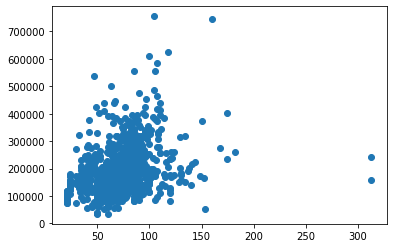

In [29]:
plt.scatter(train.LotFrontage, train.SalePrice)

In [74]:
continous

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath',
       'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')

In [16]:
[i for i in nums_train if 'Porch' in i ] # outside #'WoodDeckSF'

['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']

In [17]:
[i for i in nums_train if 'Area' in i ] # Area

['LotArea', 'MasVnrArea', 'GrLivArea', 'GarageArea', 'PoolArea']

In [21]:
[i for i in continous if 'BsmtFinSF' in i ] # finish basement

['BsmtFinSF1', 'BsmtFinSF2']

In [ ]:
['BsmtUnfSF', 'TotalBsmtSF']

In [22]:
[i for i in continous if 'FlrSF' in i ]

['1stFlrSF', '2ndFlrSF']

In [216]:
data.columns

Index(['GrLivArea', '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1',
       'YearBuilt', 'YearRemodAdd', 'OpenPorchSF', '2ndFlrSF', 'WoodDeckSF',
       'MasVnrArea', 'MSSubClass', 'OverallQual', 'TotRmsAbvGrd', 'GarageCars',
       'OverallCond', 'FullBath', 'Fireplaces', 'HalfBath', 'SqFtPerRoom',
       'Total_Home_Quality', 'Total_Bathrooms', 'Age_YrBuilt', 'Age_YrRmd',
       'Diff_YrRmd_YrBlt', 'Age_GarageYrBlt', 'Diff_GarYBlt_YrBlt',
       'LivLotRatio', 'Spaciousness', 'total_OutsideSF', 'Count_OutSideSF',
       'Rat_Out_Count', 'total_Area', 'Count_Areas', 'Rat_Areas_Count',
       'total_Floors', 'Count_Floors', 'Rat_Floors_Count', 'total_Bsmt_FinSF',
       'Tot_Bsmt_per_Fin', 'FirePlaceInHome', 'OverallCond_Price_grade',
       'space_Cluster', 'Areas_Cluster', 'Floors_Cluster', 'OutsideSF_Cluster',
       'OverAll_QC_Cluster', 'YrBlt_Cluster', 'Cyclic_MoSold', 'SalePrice'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarni

,mi_score,Corr_Score
SalePrice,6.107364,1.000000
LivLotRatio,6.066826,0.007084
Rat_Areas_Count,6.049881,0.353146
total_Area,6.025679,0.511438
SqFtPerRoom,5.550772,0.554816
Spaciousness,5.498681,0.532551
Rat_Floors_Count,5.381050,0.560167
GrLivArea,5.357844,0.695854
total_Floors,5.357835,0.701776
1stFlrSF,5.197532,0.588696


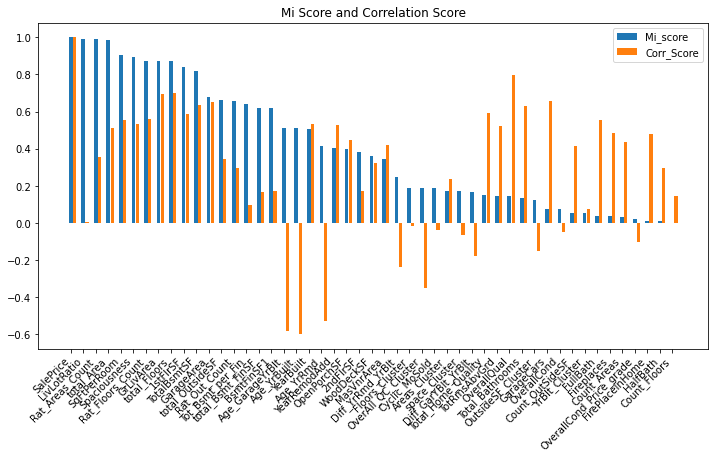

In [217]:
mi_score_corr = mi_score_and_corr_continous(df=data,cols=data.columns.drop('MSSubClass'),target_col='SalePrice',fill_na=0)

In [218]:
mi_score_corr_sorted = mi_score_corr.sort_values(by='Corr_Score', key=lambda col: abs(col),ascending=False)# col.str.lower())
mi_score_corr_sorted

,mi_score,Corr_Score
SalePrice,6.107364,1.000000
OverallQual,1.151948,0.795132
total_Floors,5.357835,0.701776
GrLivArea,5.357844,0.695854
GarageCars,0.746139,0.655085
GarageArea,4.232784,0.652208
TotalBsmtSF,5.047586,0.633152
Total_Bathrooms,1.092048,0.630492
Age_YrBuilt,3.271265,-0.597268
Total_Home_Quality,1.189297,0.591223


In [219]:
features  = mi_score_corr_sorted.index#.drop(['YearBuilt','YearRemodAdd','SalePrice'])
features

Index(['SalePrice', 'OverallQual', 'total_Floors', 'GrLivArea', 'GarageCars',
       'GarageArea', 'TotalBsmtSF', 'Total_Bathrooms', 'Age_YrBuilt',
       'Total_Home_Quality', '1stFlrSF', 'Age_GarageYrBlt', 'Rat_Floors_Count',
       'SqFtPerRoom', 'FullBath', 'YearBuilt', 'Spaciousness', 'Age_YrRmd',
       'YearRemodAdd', 'TotRmsAbvGrd', 'total_Area', 'Fireplaces',
       'FirePlaceInHome', 'OpenPorchSF', 'Count_Areas', 'MasVnrArea',
       'Count_OutSideSF', 'Rat_Areas_Count', 'OverAll_QC_Cluster',
       'total_OutsideSF', 'WoodDeckSF', 'Rat_Out_Count', 'HalfBath',
       'Areas_Cluster', 'Diff_YrRmd_YrBlt', 'Diff_GarYBlt_YrBlt', 'BsmtFinSF1',
       '2ndFlrSF', 'total_Bsmt_FinSF', 'OutsideSF_Cluster', 'Count_Floors',
       'OverallCond_Price_grade', 'Tot_Bsmt_per_Fin', 'YrBlt_Cluster',
       'space_Cluster', 'OverallCond', 'Cyclic_MoSold', 'Floors_Cluster',
       'LivLotRatio'],
      dtype='object')

In [83]:
def cross_val_class(X_train,y_train,classifier_list,classifier_name,scoring):
    """
    run quick cross validation
    params :
            :- classifier_list = array of models 
                    e.g >>> model = [AdaBoostClassifier(),RandomForestClassifier(n_estimators=50,max_leaf_nodes=25)]
            
            :- classifier_name = array (description of the model)
                    e.g >>> model_name= ['AdaBoostClassifier()','RandomForestClassifier','xg','et','lr','nb_m','dr']
                    
            
    """
    from sklearn.model_selection import cross_val_score,StratifiedShuffleSplit
    #kf=StratifiedShuffleSplit()
    mod=[]
    cv_score=[]
    for m in classifier_list:
        cv_score.append(np.sqrt(-1*cross_val_score(m,X_train,y_train,scoring=scoring,cv=5)))
    
    cross_val = pd.DataFrame(cv_score,index=classifier_name)
    return cross_val

In [84]:
scoring = 'neg_mean_squared_error'
from sklearn.linear_model import LinearRegression,Lasso,Ridge


In [220]:
cross_val_class(X_train=data[features],y_train=data.SalePrice,classifier_list=[LinearRegression(),Lasso(),Ridge()],
                classifier_name=['Lr','lasso','Ridge'],scoring=scoring)

,0,1,2,3,4
Lr,3.962461e-11,4.545255e-11,8.515747e-11,3.878098e-11,6.001913e-11
lasso,1.338325e-05,1.441758e-05,1.531378e-05,1.297053e-05,1.167860e-05
Ridge,3.441087e-08,2.881439e-08,4.102702e-08,3.553021e-08,3.205730e-08


In [126]:
data.select_dtypes(np.number).columns

Index(['GrLivArea', '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1',
       'YearBuilt', 'YearRemodAdd', 'OpenPorchSF', '2ndFlrSF', 'WoodDeckSF',
       'MasVnrArea', 'OverallQual', 'TotRmsAbvGrd', 'GarageCars',
       'OverallCond', 'FullBath', 'Fireplaces', 'HalfBath', 'SqFtPerRoom',
       'Total_Home_Quality', 'Total_Bathrooms', 'Age_YrBuilt', 'Age_YrRmd',
       'Diff_YrRmd_YrBlt', 'Age_GarageYrBlt', 'Diff_GarYBlt_YrBlt',
       'LivLotRatio', 'Spaciousness', 'total_OutsideSF', 'Count_OutSideSF',
       'Rat_Out_Count', 'total_Area', 'Count_Areas', 'Rat_Areas_Count',
       'total_Floors', 'Count_Floors', 'Rat_Floors_Count', 'total_Bsmt_FinSF',
       'Tot_Bsmt_per_Fin', 'FirePlaceInHome', 'OverallCond_Price_grade',
       'space_Cluster', 'Areas_Cluster', 'Floors_Cluster', 'OutsideSF_Cluster',
       'OverAll_QC_Cluster', 'Cen_space_0', 'Cen_space_1', 'Cen_space_2',
       'Cen_space_3', 'Cen_space_4', 'Cen_space_5', 'Cen_space_6',
       'Cen_space_7', 'Cen_space_8', 'Cen_

In [221]:
    train_num_null = data[data.select_dtypes(np.number).columns].isna().sum()
    num_col_with_na = train_num_null[train_num_null>0].index.tolist()

In [222]:
num_col_with_na

[]

In [135]:
data.isna().sum().sort_values(ascending=False)

Cen_space_2           28
Cen_Areas_4           28
Cen_Floors_4          28
Cen_Floors_3          28
Cen_Floors_2          28
                      ..
total_OutsideSF        0
Spaciousness           0
LivLotRatio            0
Diff_GarYBlt_YrBlt     0
SalePrice              0
Length: 98, dtype: int64

In [ ]:
#before num_cat and clusters,kaggle =33.8k

In [ ]:
#after 28.315 ...before centroid

In [151]:
cross_val_class(X_train=data[new_cols_15],y_train=data.SalePrice,classifier_list=[LinearRegression(),Lasso(),Ridge()],
                classifier_name=['Lr','lasso','Ridge'],scoring=scoring)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.029e+11, tolerance: 6.276e+08
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.754e+11, tolerance: 5.989e+08
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.226e+11, toleranc

,0,1,2,3,4
Lr,34759.848753,31326.402538,34664.450464,34457.699932,34187.580280
lasso,34758.774089,31326.610067,34664.602639,34457.687482,34187.196767
Ridge,34758.498519,31327.695400,34666.361796,34458.048044,34184.092668


In [155]:
cross_val_class(X_train=data[new_cols_10],y_train=data.SalePrice,classifier_list=[LinearRegression(),Lasso(),Ridge()],
                classifier_name=['Lr','lasso','Ridge'],scoring=scoring)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.552e+11, tolerance: 6.276e+08
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.341e+08, tolerance: 6.117e+08
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.227e+10, toleranc

,0,1,2,3,4
Lr,35860.449188,31749.257702,36876.132005,35387.425660,34844.564420
lasso,35859.360916,31749.258126,36876.141167,35387.413807,34844.558969
Ridge,35860.445132,31749.258341,36876.135383,35387.425385,34844.562877


In [159]:
cross_val_class(X_train=data[new_cols_5],y_train=data.SalePrice,classifier_list=[LinearRegression(),Lasso(),Ridge()],
                classifier_name=['Lr','lasso','Ridge'],scoring=scoring)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.668e+11, tolerance: 6.276e+08
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.254e+11, tolerance: 6.117e+08
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.825e+11, toleranc

,0,1,2,3,4
Lr,37633.115637,36222.133628,42382.641187,39485.646985,39839.691392
lasso,37630.813695,36222.134997,42382.644779,39485.653612,39839.691913
Ridge,37633.113378,36222.133702,42382.641296,39485.647110,39839.691406


In [161]:
def Standardize(df,target_col):
    df_def = df.copy()
    num = df_def.select_dtypes(exclude='object').columns
    for col in num:
        if col!=target_col:
            max_ = df_def[col].max() # since correlation is always <=1 ..for better visualization we normalize
            min_ = df_def[col].min()
            norm_ = (df_def[col] - min_)/(max_-min_)
            df_def.loc[:,col] = norm_
    return df_def

In [162]:
standard_df = Standardize(df=data[new_cols_20],target_col='SalePrice')

In [163]:
standard_df

,total_Floors,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,Rat_Floors_Count,Age_YrBuilt,Age_YrRmd,Spaciousness,MasVnrArea,Count_Areas,Count_OutSideSF,total_OutsideSF,BsmtFinSF1,total_Bsmt_FinSF,total_Area,OpenPorchSF,WoodDeckSF
0,0.435581,0.420281,0.469983,0.357860,0.253644,0.253158,0.050725,0.116667,0.340416,0.201026,0.75,0.333333,0.059396,0.322669,0.322669,0.041482,0.111517,0.000000
1,0.293764,0.283445,0.394511,0.527592,0.450923,0.450923,0.246377,0.566667,0.329818,0.000000,0.50,0.333333,0.290166,0.446984,0.446984,0.045276,0.000000,0.347725
2,0.459639,0.443494,0.521441,0.384615,0.284742,0.271623,0.065217,0.133333,0.600703,0.166154,0.75,0.333333,0.040896,0.222121,0.222121,0.055139,0.076782,0.000000
3,0.437797,0.422419,0.550600,0.316054,0.304665,0.254859,0.688406,0.666667,0.438231,0.000000,0.50,0.666667,0.298929,0.098720,0.098720,0.045649,0.063985,0.000000
4,0.590060,0.569334,0.716981,0.478679,0.394072,0.371720,0.072464,0.166667,0.434932,0.358974,0.75,0.666667,0.268744,0.299360,0.299360,0.073847,0.153565,0.224037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.415638,0.401038,0.394511,0.398411,0.300777,0.237852,0.079710,0.166667,0.407214,0.000000,0.50,0.333333,0.038948,0.000000,0.000000,0.037877,0.073126,0.000000
1456,0.550491,0.531155,0.428816,0.644649,0.844995,0.844995,0.231884,0.366667,0.595977,0.122051,0.75,0.333333,0.339825,0.361060,0.435558,0.067493,0.000000,0.407235
1457,0.635011,0.612706,0.216123,0.481605,0.414966,0.406220,0.500000,0.066667,0.483871,0.000000,0.50,0.333333,0.058423,0.125686,0.125686,0.046206,0.109689,0.000000
1458,0.235518,0.227245,0.205832,0.450669,0.361516,0.361516,0.434783,0.233333,0.346154,0.000000,0.50,0.666667,0.465433,0.022395,0.492687,0.043107,0.000000,0.427071


In [164]:
cross_val_class(X_train=standard_df,y_train=data.SalePrice,classifier_list=[LinearRegression(),Lasso(),Ridge()],
                classifier_name=['Lr','lasso','Ridge'],scoring=scoring)

,0,1,2,3,4
Lr,33871.123944,29044.822588,33713.395308,32826.782264,32724.664158
lasso,33789.883207,29026.001346,33724.157350,32832.816384,32717.248608
Ridge,32970.148412,28838.468667,34079.199595,33100.177428,32379.642238


In [89]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [90]:
def Prepare_Validation_Framework(df):    
    np.random.seed(2) # setting random seed

    n = len(df) # number of rows

    n_val = int(0.2 * n) # validation set is 20% of the data
    n_test = int(0.2 * n) # test set is 20% of the data
    n_train = n - (n_val + n_test) # training set  is 60% of the data

    idx = np.arange(n) # indexes
    np.random.shuffle(idx) # shuffling the data 

    df_shuffled = df.iloc[idx] #shuffled data frame

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    return df_train,df_val,df_test

In [223]:
df_train , df_val, df_test = Prepare_Validation_Framework(df=data[features.to_list()+['SalePrice']])

In [224]:
df_train

,SalePrice,OverallQual,total_Floors,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,Total_Bathrooms,Age_YrBuilt,Total_Home_Quality,1stFlrSF,Age_GarageYrBlt,Rat_Floors_Count,SqFtPerRoom,FullBath,YearBuilt,Spaciousness,Age_YrRmd,YearRemodAdd,TotRmsAbvGrd,total_Area,Fireplaces,FirePlaceInHome,OpenPorchSF,Count_Areas,MasVnrArea,Count_OutSideSF,Rat_Areas_Count,OverAll_QC_Cluster,total_OutsideSF,WoodDeckSF,Rat_Out_Count,HalfBath,Areas_Cluster,Diff_YrRmd_YrBlt,Diff_GarYBlt_YrBlt,BsmtFinSF1,2ndFlrSF,total_Bsmt_FinSF,OutsideSF_Cluster,Count_Floors,OverallCond_Price_grade,Tot_Bsmt_per_Fin,YrBlt_Cluster,space_Cluster,OverallCond,Cyclic_MoSold,Floors_Cluster,LivLotRatio,SalePrice
1107,274725,7,7.611842,7.611842,2,422,868,2.5,0.000000,12,6.788972,0.000000,6.919190,5.052810,2,7.604396,5.418566,0,2006,2.302585,10.187500,0.693147,1,4.615121,4,0.000000,1,8.801319,4,4.615121,0.000000,4.615121,0.693147,1.791759,0.000000,0.0,0.000000,7.034388,0.000000,4,2,2,0.000000,1,2,1.791759,-0.000011,5,0.083328,274725
797,110000,5,6.651572,6.651572,1,240,773,1.0,4.025352,10,6.651572,4.025352,6.651572,4.866252,1,7.577634,5.269146,55,1953,1.609438,9.155250,0.000000,0,0.000000,4,0.000000,0,7.769273,9,0.000000,0.000000,0.000000,0.000000,1.945910,0.000000,0.0,6.347389,0.000000,6.347389,4,1,2,0.857025,0,4,1.791759,0.500004,1,0.095938,110000
733,131400,5,7.043160,7.043160,1,264,864,2.0,3.891820,11,7.043160,3.891820,7.043160,4.969813,1,7.581720,5.255758,26,1983,1.945910,9.415157,0.693147,1,0.000000,4,0.000000,1,8.029107,0,5.111988,5.111988,5.111988,0.000000,1.945910,3.135494,0.0,6.388561,0.000000,6.388561,1,1,3,0.897942,0,8,1.945910,0.000004,7,0.108316,131400
1283,139000,6,7.509335,7.509335,0,0,912,3.0,3.688879,11,6.816736,4.014580,6.816736,4.877376,2,7.586804,5.433722,39,1971,2.197225,9.404014,0.000000,0,0.000000,3,0.000000,1,8.305566,7,4.859812,4.859812,4.859812,1.098612,1.945910,0.000000,-15.4,0.000000,6.816736,0.000000,1,2,2,0.000000,0,2,1.791759,0.500004,5,0.177345,139000
831,151000,7,7.021976,7.090910,2,480,600,2.5,0.693147,12,6.255750,0.693147,6.329721,5.017280,2,7.603898,5.638355,1,2005,1.609438,8.605387,0.000000,0,5.117994,4,0.000000,1,7.219642,4,5.117994,0.000000,5.117994,0.693147,0.000000,0.000000,0.0,0.000000,6.398595,0.000000,5,2,2,0.000000,1,6,1.791759,1.000000,8,0.320168,151000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,403000,8,7.935587,7.935587,3,810,1462,3.5,2.708050,13,7.307202,2.708050,7.242798,5.374922,2,7.598900,5.741221,13,1996,2.302585,9.938420,0.693147,1,4.990433,5,6.228511,2,8.329175,1,5.855072,0.000000,5.164786,0.693147,2.302585,0.693147,0.0,6.536692,7.173958,6.536692,3,2,2,1.138447,1,9,1.791759,0.866021,2,0.169379,403000
833,167000,6,7.324490,7.324490,2,472,1516,1.5,3.828641,12,7.324490,3.828641,7.324490,5.132525,1,7.583248,5.536021,45,1964,1.945910,9.524348,0.000000,0,0.000000,5,5.198497,1,7.915202,0,5.030438,0.000000,5.030438,0.693147,2.197225,0.000000,0.0,5.283204,0.000000,6.295266,0,1,3,1.335585,0,1,1.945910,-0.499998,3,0.141100,167000
1019,213490,7,7.317876,7.317876,2,440,1362,2.0,0.693147,12,7.317876,0.693147,7.317876,5.125946,2,7.603898,5.529429,1,2005,1.945910,8.774468,0.693147,1,3.044522,5,4.983607,2,7.165648,4,5.093750,4.962845,4.406719,0.000000,2.197225,0.000000,0.0,2.833213,0.000000,2.833213,1,1,2,4.455800,1,1,1.791759,0.500004,3,0.405354,213490
50,177000,6,7.293698,7.293698,2,388,794,2.5,2.397895,12,6.678342,2.397895,6.601230,5.101897,2,7.599902,5.505332,10,1997,1.945910,9.712448,0.000000,0,4.330733,4,0.000000,1,8.326335,0,4.330733,0.000000,4.330733,0.000000,1.791759,0.000000,0.0,5.209486,6.517671,5.209486,4,2,3,1.679456,1,6,1.945910,0.866021,8,0.100742,177000


In [225]:
y_train_orig = df_train.SalePrice.values
y_val_orig = df_val.SalePrice.values
y_test_orig = df_test.SalePrice.values

y_train = np.log1p(df_train.SalePrice.values)
y_val = np.log1p(df_val.SalePrice.values)
y_test = np.log1p(df_test.SalePrice.values)

del df_train['SalePrice']
del df_val['SalePrice']
del df_test['SalePrice']

In [226]:
df_train

,OverallQual,total_Floors,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,Total_Bathrooms,Age_YrBuilt,Total_Home_Quality,1stFlrSF,Age_GarageYrBlt,Rat_Floors_Count,SqFtPerRoom,FullBath,YearBuilt,Spaciousness,Age_YrRmd,YearRemodAdd,TotRmsAbvGrd,total_Area,Fireplaces,FirePlaceInHome,OpenPorchSF,Count_Areas,MasVnrArea,Count_OutSideSF,Rat_Areas_Count,OverAll_QC_Cluster,total_OutsideSF,WoodDeckSF,Rat_Out_Count,HalfBath,Areas_Cluster,Diff_YrRmd_YrBlt,Diff_GarYBlt_YrBlt,BsmtFinSF1,2ndFlrSF,total_Bsmt_FinSF,OutsideSF_Cluster,Count_Floors,OverallCond_Price_grade,Tot_Bsmt_per_Fin,YrBlt_Cluster,space_Cluster,OverallCond,Cyclic_MoSold,Floors_Cluster,LivLotRatio
1107,7,7.611842,7.611842,2,422,868,2.5,0.000000,12,6.788972,0.000000,6.919190,5.052810,2,7.604396,5.418566,0,2006,2.302585,10.187500,0.693147,1,4.615121,4,0.000000,1,8.801319,4,4.615121,0.000000,4.615121,0.693147,1.791759,0.000000,0.0,0.000000,7.034388,0.000000,4,2,2,0.000000,1,2,1.791759,-0.000011,5,0.083328
797,5,6.651572,6.651572,1,240,773,1.0,4.025352,10,6.651572,4.025352,6.651572,4.866252,1,7.577634,5.269146,55,1953,1.609438,9.155250,0.000000,0,0.000000,4,0.000000,0,7.769273,9,0.000000,0.000000,0.000000,0.000000,1.945910,0.000000,0.0,6.347389,0.000000,6.347389,4,1,2,0.857025,0,4,1.791759,0.500004,1,0.095938
733,5,7.043160,7.043160,1,264,864,2.0,3.891820,11,7.043160,3.891820,7.043160,4.969813,1,7.581720,5.255758,26,1983,1.945910,9.415157,0.693147,1,0.000000,4,0.000000,1,8.029107,0,5.111988,5.111988,5.111988,0.000000,1.945910,3.135494,0.0,6.388561,0.000000,6.388561,1,1,3,0.897942,0,8,1.945910,0.000004,7,0.108316
1283,6,7.509335,7.509335,0,0,912,3.0,3.688879,11,6.816736,4.014580,6.816736,4.877376,2,7.586804,5.433722,39,1971,2.197225,9.404014,0.000000,0,0.000000,3,0.000000,1,8.305566,7,4.859812,4.859812,4.859812,1.098612,1.945910,0.000000,-15.4,0.000000,6.816736,0.000000,1,2,2,0.000000,0,2,1.791759,0.500004,5,0.177345
831,7,7.021976,7.090910,2,480,600,2.5,0.693147,12,6.255750,0.693147,6.329721,5.017280,2,7.603898,5.638355,1,2005,1.609438,8.605387,0.000000,0,5.117994,4,0.000000,1,7.219642,4,5.117994,0.000000,5.117994,0.693147,0.000000,0.000000,0.0,0.000000,6.398595,0.000000,5,2,2,0.000000,1,6,1.791759,1.000000,8,0.320168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,8,7.935587,7.935587,3,810,1462,3.5,2.708050,13,7.307202,2.708050,7.242798,5.374922,2,7.598900,5.741221,13,1996,2.302585,9.938420,0.693147,1,4.990433,5,6.228511,2,8.329175,1,5.855072,0.000000,5.164786,0.693147,2.302585,0.693147,0.0,6.536692,7.173958,6.536692,3,2,2,1.138447,1,9,1.791759,0.866021,2,0.169379
833,6,7.324490,7.324490,2,472,1516,1.5,3.828641,12,7.324490,3.828641,7.324490,5.132525,1,7.583248,5.536021,45,1964,1.945910,9.524348,0.000000,0,0.000000,5,5.198497,1,7.915202,0,5.030438,0.000000,5.030438,0.693147,2.197225,0.000000,0.0,5.283204,0.000000,6.295266,0,1,3,1.335585,0,1,1.945910,-0.499998,3,0.141100
1019,7,7.317876,7.317876,2,440,1362,2.0,0.693147,12,7.317876,0.693147,7.317876,5.125946,2,7.603898,5.529429,1,2005,1.945910,8.774468,0.693147,1,3.044522,5,4.983607,2,7.165648,4,5.093750,4.962845,4.406719,0.000000,2.197225,0.000000,0.0,2.833213,0.000000,2.833213,1,1,2,4.455800,1,1,1.791759,0.500004,3,0.405354
50,6,7.293698,7.293698,2,388,794,2.5,2.397895,12,6.678342,2.397895,6.601230,5.101897,2,7.599902,5.505332,10,1997,1.945910,9.712448,0.000000,0,4.330733,4,0.000000,1,8.326335,0,4.330733,0.000000,4.330733,0.000000,1.791759,0.000000,0.0,5.209486,6.517671,5.209486,4,2,3,1.679456,1,6,1.945910,0.866021,8,0.100742


In [169]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [170]:
df_train.shape

(860, 45)

In [227]:
#y_train vs y_pred #29 cols
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(df_train, y_train, r=r)
    y_pred = w_0 + df_train.dot(w)
    print(f"alpha={r} : rmse = {rmse(y_train, y_pred)}")

alpha=1e-06 : rmse = 0    0.119023
1    0.119023
dtype: float64
alpha=0.0001 : rmse = 0    0.119104
1    0.119104
dtype: float64
alpha=0.001 : rmse = 0    0.119157
1    0.119157
dtype: float64
alpha=0.01 : rmse = 0    0.11922
1    0.11922
dtype: float64
alpha=0.1 : rmse = 0    0.119484
1    0.119484
dtype: float64
alpha=1 : rmse = 0    0.120135
1    0.120135
dtype: float64
alpha=5 : rmse = 0    0.120792
1    0.120792
dtype: float64
alpha=10 : rmse = 0    0.121162
1    0.121162
dtype: float64


In [ ]:
#0.153 ...before

In [ ]:
#0.12
#log 0.11

alpha=1e-06 : rmse = 0    0.119023
1    0.119023
dtype: float64


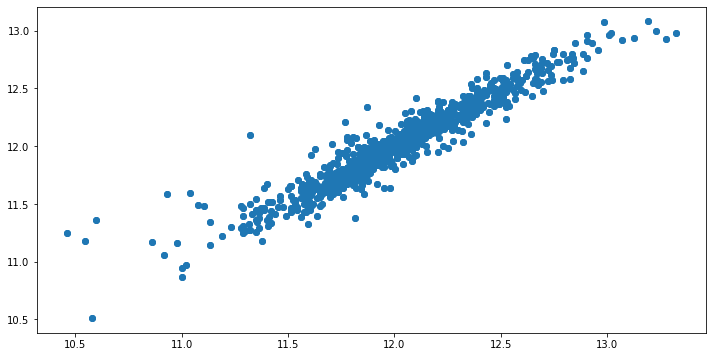

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


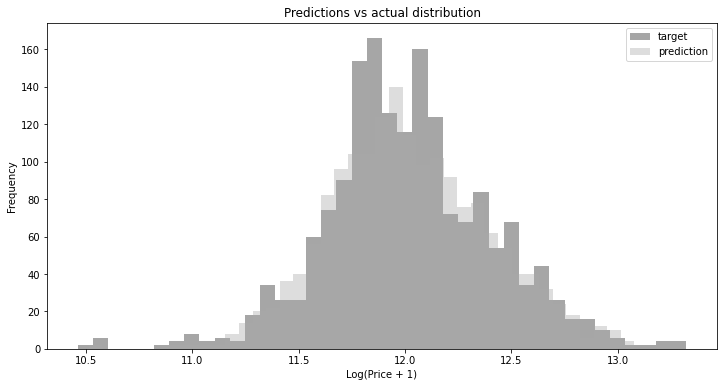

ValueError: Per-column arrays must each be 1-dimensional

In [228]:
#y_train vs y_pred #18cols
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(df_train, y_train, r=r)
    y_pred = w_0 + df_train.dot(w)
    print(f"alpha={r} : rmse = {rmse(y_train, y_pred)}")
    #plt.title()
    plt.scatter(y_train,y_pred)
    plt.show()
    sns.distplot(y_train, label='target', color='#222222', kde = False, bins=40)
    sns.distplot(y_pred, label='prediction', color='#aaaaaa',kde = False, bins=40)
    plt.legend()
    plt.ylabel('Frequency')
    plt.xlabel('Log(Price + 1)')
    plt.title('Predictions vs actual distribution')
    plt.show()
    sns.lineplot(x=np.arange(len(y_train)),y=y_train, label='target',color='g')
    sns.lineplot(x=np.arange(len(y_pred)),y=y_pred, label='prediction',color='r')
    plt.legend()
    plt.show()

In [203]:
#standardize
standard_df = Standardize(df=df_train,target_col='SalePrice')
#y_train vs y_pred
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(standard_df, y_train, r=r)
    y_pred = w_0 + standard_df.dot(w)
    print(f"alpha={r} : rmse = {rmse(y_train, y_pred)}")

alpha=1e-06 : rmse = 0.15838014219194688
alpha=0.0001 : rmse = 0.1583801424817948
alpha=0.001 : rmse = 0.15838017116722772
alpha=0.01 : rmse = 0.15838302744533028
alpha=0.1 : rmse = 0.15865709046023896
alpha=1 : rmse = 0.1778387201612552
alpha=5 : rmse = 0.32506748068304026
alpha=10 : rmse = 0.4681654152679198


In [229]:
#y_train_orig vs np.exp
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(df_train, y_train, r=r)
    y_pred = w_0 + df_train.dot(w)
    print(f"alpha={r} : rmse = {rmse(y_train_orig, np.exp(y_pred))}")

alpha=1e-06 : rmse = 0    21579.836971
1    21579.836971
dtype: float64
alpha=0.0001 : rmse = 0    21565.301483
1    21565.301483
dtype: float64
alpha=0.001 : rmse = 0    21584.745694
1    21584.745694
dtype: float64
alpha=0.01 : rmse = 0    21614.771945
1    21614.771945
dtype: float64
alpha=0.1 : rmse = 0    21678.550855
1    21678.550855
dtype: float64
alpha=1 : rmse = 0    21837.088148
1    21837.088148
dtype: float64
alpha=5 : rmse = 0    21955.295654
1    21955.295654
dtype: float64
alpha=10 : rmse = 0    22018.715296
1    22018.715296
dtype: float64


In [ ]:
#before 27.5k

In [ ]:
#24k
#log

In [174]:
#y_train_orig vs np.exp
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(df_train, y_train, r=r)
    y_pred = w_0 + df_train.dot(w)
    print(f"alpha={r} : rmse = {rmse(y_train_orig, np.exp(y_pred))}")

alpha=1e-06 : rmse = 21609.998201766324
alpha=0.0001 : rmse = 21590.681917363076
alpha=0.001 : rmse = 21586.659919824087
alpha=0.01 : rmse = 21610.16601828529
alpha=0.1 : rmse = 22820.59185454269
alpha=1 : rmse = 26560.07071546465
alpha=5 : rmse = 29527.473724985754
alpha=10 : rmse = 30515.43707644423


In [100]:
#y_train_orig vs Y_train_orig
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(df_train, y_train_orig, r=r)
    y_pred = w_0 + df_train.dot(w)
    print(f"alpha={r} : rmse = {rmse(y_train_orig, y_pred)}")

alpha=1e-06 : rmse = 103997.02809087721
alpha=0.0001 : rmse = 26199.960014873985
alpha=0.001 : rmse = 26192.810874393486
alpha=0.01 : rmse = 26192.671975529225
alpha=0.1 : rmse = 26194.84754819392
alpha=1 : rmse = 26252.23850107177
alpha=5 : rmse = 26387.590726459977
alpha=10 : rmse = 26475.235311452077


In [ ]:
#before 31.3k

In [ ]:
#26.4k

In [205]:
#y_train_orig vs Y_train_orig
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(df_train, y_train_orig, r=r)
    y_pred = w_0 + df_train.dot(w)
    print(f"alpha={r} : rmse = {rmse(y_train_orig, y_pred)}")

alpha=1e-06 : rmse = 31825.027600918776
alpha=0.0001 : rmse = 31825.027601260103
alpha=0.001 : rmse = 31825.027635044615
alpha=0.01 : rmse = 31825.031003232813
alpha=0.1 : rmse = 31825.357805603257
alpha=1 : rmse = 31850.054585468715
alpha=5 : rmse = 32076.55937213471
alpha=10 : rmse = 32298.02659871078


In [ ]:
#before #32k

In [101]:
#y_val vs y_pred
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(df_train, y_train, r=r)
    y_pred = w_0 + df_val.dot(w)
    print(f"alpha={r} : rmse = {rmse(y_val, y_pred)}")

alpha=1e-06 : rmse = 6.251443559455237
alpha=0.0001 : rmse = 0.1343015127581079
alpha=0.001 : rmse = 0.12749353861581936
alpha=0.01 : rmse = 0.12703459386176277
alpha=0.1 : rmse = 0.13084214818521891
alpha=1 : rmse = 0.2136311049590599
alpha=5 : rmse = 0.2978924034888298
alpha=10 : rmse = 0.3185932983436411


In [102]:
#y_val vs y_pred
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(df_train, y_train, r=r)
    y_pred = w_0 + df_val.dot(w)
    print(f"alpha={r} : rmse = {rmse(y_val, y_pred)}")

alpha=1e-06 : rmse = 6.251443559455237
alpha=0.0001 : rmse = 0.1343015127581079
alpha=0.001 : rmse = 0.12749353861581936
alpha=0.01 : rmse = 0.12703459386176277
alpha=0.1 : rmse = 0.13084214818521891
alpha=1 : rmse = 0.2136311049590599
alpha=5 : rmse = 0.2978924034888298
alpha=10 : rmse = 0.3185932983436411


In [ ]:
#before 0.15

In [ ]:
#0.12

In [175]:
#y_val_orig vs np.exp
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(df_train, y_train, r=r)
    y_pred = w_0 + df_val.dot(w)
    print(f"alpha={r} : rmse = {rmse(y_val_orig, np.exp(y_pred))}")

alpha=1e-06 : rmse = 20282.003264326224
alpha=0.0001 : rmse = 20217.72386556628
alpha=0.001 : rmse = 20224.30936319581
alpha=0.01 : rmse = 20341.211637633518
alpha=0.1 : rmse = 22291.114818876424
alpha=1 : rmse = 27255.87599869405
alpha=5 : rmse = 30652.87152330126
alpha=10 : rmse = 31908.31281461809


In [ ]:
# before 26k

In [ ]:
#22k

In [176]:
#y_val_orig vs np.exp
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(df_train, y_train, r=r)
    y_pred = w_0 + df_val.dot(w)
    print(f"alpha={r} : rmse = {rmse(y_val_orig, np.exp(y_pred))}")

alpha=1e-06 : rmse = 20282.003264326224
alpha=0.0001 : rmse = 20217.72386556628
alpha=0.001 : rmse = 20224.30936319581
alpha=0.01 : rmse = 20341.211637633518
alpha=0.1 : rmse = 22291.114818876424
alpha=1 : rmse = 27255.87599869405
alpha=5 : rmse = 30652.87152330126
alpha=10 : rmse = 31908.31281461809


In [177]:
#Y_train_orig
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(df_train, y_train_orig, r=r)
    y_pred = w_0 + df_val.dot(w)
    print(f"alpha={r} : rmse = {rmse(y_val_orig, y_pred)}")

alpha=1e-06 : rmse = 24743.747733445936
alpha=0.0001 : rmse = 24773.70112211555
alpha=0.001 : rmse = 24693.916849456415
alpha=0.01 : rmse = 24412.916038440508
alpha=0.1 : rmse = 24364.42824436478
alpha=1 : rmse = 24627.605686093448
alpha=5 : rmse = 24986.690843035216
alpha=10 : rmse = 25068.526234084893


In [ ]:
#29k before

In [ ]:
#25k

In [230]:
#Y_train_orig
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(df_train, y_train_orig, r=r)
    y_pred = w_0 + df_val.dot(w)
    print(f"alpha={r} : rmse = {rmse(y_val_orig, y_pred)}")

alpha=1e-06 : rmse = 0    24639.091774
1    24639.091774
dtype: float64
alpha=0.0001 : rmse = 0    24654.453777
1    24654.453777
dtype: float64
alpha=0.001 : rmse = 0    24563.796487
1    24563.796487
dtype: float64
alpha=0.01 : rmse = 0    24303.357745
1    24303.357745
dtype: float64
alpha=0.1 : rmse = 0    24332.04436
1    24332.04436
dtype: float64
alpha=1 : rmse = 0    24633.545732
1    24633.545732
dtype: float64
alpha=5 : rmse = 0    24617.115285
1    24617.115285
dtype: float64
alpha=10 : rmse = 0    24490.120862
1    24490.120862
dtype: float64


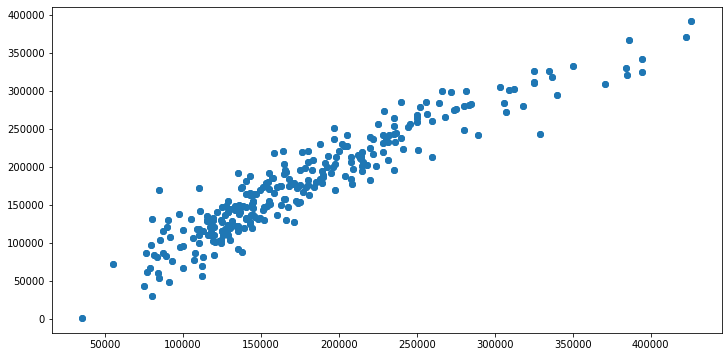

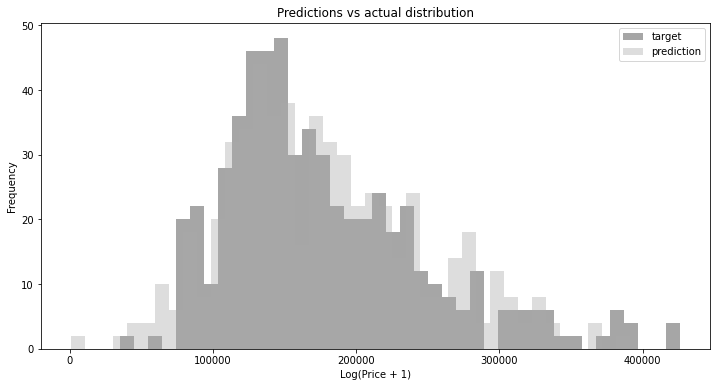

ValueError: Per-column arrays must each be 1-dimensional

In [231]:
    w_0, w = train_linear_regression_reg(df_train, y_train_orig, r=1)
    y_pred = w_0 + df_val.dot(w)
    plt.scatter(y_val_orig,y_pred)
    plt.show()
    sns.distplot(y_val_orig, label='target', color='#222222', kde = False, bins=40)
    sns.distplot(y_pred, label='prediction', color='#aaaaaa',kde = False, bins=40)
    plt.legend()
    plt.ylabel('Frequency')
    plt.xlabel('Log(Price + 1)')
    plt.title('Predictions vs actual distribution')
    plt.show()
    sns.lineplot(x=np.arange(len(y_val_orig)),y=y_val_orig, label='target',color='g')
    sns.lineplot(x=np.arange(len(y_pred)),y=y_pred, label='prediction',color='r')
    bias= y_val_orig - y_pred
    plt.legend()
    plt.show()
    sns.lineplot(x=np.arange(len(y_pred)),y=bias, label='bias',color='r')
    plt.show()

In [180]:
w_0

-37591.50709554186

In [181]:
np.round(w,1)

array([ 4.38860e+03, -2.32911e+04, -1.97650e+04,  5.80010e+03,
        4.21000e+01,  4.56000e+01,  4.44230e+03, -2.95530e+03,
        1.12347e+04,  3.33115e+04, -1.14160e+04,  1.54700e+03,
        5.66150e+04,  1.09270e+03, -3.71869e+04, -3.91000e+01,
        2.01907e+04,  7.03000e+02,  3.41714e+04, -1.69890e+04,
       -2.34900e+02, -2.82093e+04,  6.59780e+03, -4.46650e+03,
        2.22917e+04, -9.21100e+02,  1.71860e+04,  8.56000e+01,
       -1.73395e+04,  1.13471e+04,  2.32260e+03,  2.34160e+03,
       -3.73800e+02,  4.25050e+03,  1.75623e+04, -1.70220e+03,
        2.39400e+02, -7.36685e+04, -3.15800e+02, -4.48900e+03,
        1.31500e+03, -3.81941e+04,  3.62630e+03, -2.18620e+03,
       -9.83200e+03])

In [182]:
df_train.columns

Index(['OverallQual', 'total_Floors', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', 'Total_Bathrooms', 'Age_YrBuilt', 'Total_Home_Quality',
       '1stFlrSF', 'Age_GarageYrBlt', 'Rat_Floors_Count', 'SqFtPerRoom',
       'FullBath', 'Spaciousness', 'Age_YrRmd', 'TotRmsAbvGrd', 'total_Area',
       'Fireplaces', 'FirePlaceInHome', 'OpenPorchSF', 'Count_Areas',
       'MasVnrArea', 'Count_OutSideSF', 'Rat_Areas_Count',
       'OverAll_QC_Cluster', 'total_OutsideSF', 'WoodDeckSF', 'Rat_Out_Count',
       'HalfBath', 'Areas_Cluster', 'Diff_YrRmd_YrBlt', 'Diff_GarYBlt_YrBlt',
       'BsmtFinSF1', '2ndFlrSF', 'total_Bsmt_FinSF', 'OutsideSF_Cluster',
       'Count_Floors', 'OverallCond_Price_grade', 'Tot_Bsmt_per_Fin',
       'space_Cluster', 'OverallCond', 'Cyclic_MoSold', 'Floors_Cluster',
       'LivLotRatio'],
      dtype='object')

In [183]:
pd.Series(data=w,index=df_train.columns)

OverallQual                 4388.637973
total_Floors              -23291.146155
GrLivArea                 -19765.005649
GarageCars                  5800.106749
GarageArea                    42.121091
TotalBsmtSF                   45.573092
Total_Bathrooms             4442.322273
Age_YrBuilt                -2955.272859
Total_Home_Quality         11234.689186
1stFlrSF                   33311.537356
Age_GarageYrBlt           -11415.955287
Rat_Floors_Count            1546.996321
SqFtPerRoom                56614.971299
FullBath                    1092.680273
Spaciousness              -37186.919267
Age_YrRmd                    -39.112561
TotRmsAbvGrd               20190.747415
total_Area                   703.001418
Fireplaces                 34171.366880
FirePlaceInHome           -16989.020316
OpenPorchSF                 -234.913292
Count_Areas               -28209.305506
MasVnrArea                  6597.810751
Count_OutSideSF            -4466.504674
Rat_Areas_Count            22291.669846


## squared features

In [228]:
def prepare_X_con(df,base_con,cons):
    #GrLivArea 4000,1stFlrSF 2500 ,TotalBsmtSF 3000 ,GarageArea 1200
    condition = (df.GrLivArea <4000) & (df['1stFlrSF'] < 2500) & (df.TotalBsmtSF < 3000) & ( df.GarageArea  < 1200) & (df.MasVnrArea<1000)
    df_def = df[condition]
    
    df_def = df_def[cons].fillna(0)
    created_features= []
    drops=[]
    
    def adding_similar_features(new_col,features):
        new_feature = 'total_'+new_col
        df_def[new_feature] = df_def[features].sum(axis=1)
        created_features.append(new_feature)
        print(f"Created New_Feat : '{new_feature}' succesfully!")
        print("Created Features list :",created_features)
        print()
        
    def Count_Feat_Engr(components,new_feature):
        df_def[new_feature] = df_def[components].gt(0).sum(axis=1)
        created_features.append(new_feature)
        print(f"Created New_Feat : '{new_feature}' succesfully!")
        print("Created Features list :",created_features)
        print()
        
    def Ratio(a,b,ratio_name):
        new_feature = ratio_name
        df_def[new_feature] = df_def[a]/df_def[b]
        mask = df_def[b]==0
        df_def.loc[mask,new_feature]=0 # to handle infinity
        created_features.append(new_feature)
        print(f"Created New_Feat : '{new_feature}' succesfully!")
        print("Created Features list :",created_features)
        print()
        
    def SquareFeatures(features):
        for feat in features:
            new_feature=feat+'_^2'
            df_def[new_feature]= df_def[feat]*df_def[feat]
            created_features.append(new_feature)
            print(f"Created New_Feat : '{new_feature}' succesfully!")
            print("Created Features list :",created_features)
            print()
            
            
            
        
        
        
    def create_polynomial_features(d_pol,poly_features,alias,interaction_only =True):     
        from sklearn.preprocessing import PolynomialFeatures
        poly = PolynomialFeatures(degree=2,interaction_only=interaction_only,include_bias=False)

        poly1 = poly.fit_transform(d_pol[poly_features])
        
        df_poly = pd.DataFrame(poly1,columns=[f'poly_{alias}_{i}' for i in range(poly1.shape[1])])
        d_pol=pd.concat([d_pol,df_poly],axis=1)
        display(d_pol.head(2))
        pol_cols = [f'poly_{alias}_{i}' for i in range(poly1.shape[1])]
        created_features.extend(pol_cols)
        print(f"Created New_Feat : '{pol_cols}' succesfully!")
        print("Created Features list :",created_features)
        print()
        return d_pol



    def fundamentals():
        #'YearBuilt', 'YearRemodAdd','GarageYrBlt'
        df_def['Age_YrBuilt'] = 2010-df_def.YearBuilt
        df_def['Age_YrRmd'] = 2010-df_def.YearRemodAdd
        df_def['Diff_YrRmd_YrBlt'] = df_def.YearRemodAdd-df_def.YearBuilt
        df_def['Age_GarageYrBlt'] = 2010 - df_def.GarageYrBlt
        df_def['Diff_GarYBlt_YrBlt'] = df_def.GarageYrBlt-df_def.YearBuilt
        
        df_def["LivLotRatio"] = df_def.GrLivArea  /df_def.LotArea
        df_def["Spaciousness"] = (df_def['1stFlrSF'] + df_def['2ndFlrSF']) / df_def.TotRmsAbvGrd
        #df_def["TotalOutsideSF"] =  df_def.WoodDeckSF + df_def.OpenPorchSF + df_def.EnclosedPorch + df_def.Threeseasonporch + df_def.ScreenPorch
        #df_def["PorchTypes"] = df_def[['WoodDeckSF','OpenPorchSF','EnclosedPorch','Threeseasonporch','ScreenPorch']].gt(0).sum(axis=1)
        new_cols = ['Age_YrBuilt','Age_YrRmd','Diff_YrRmd_YrBlt','Age_GarageYrBlt','Diff_GarYBlt_YrBlt',"LivLotRatio","Spaciousness"]
        created_features.extend(new_cols)
        print(f"Created New_Feat : '{new_cols}' succesfully!")
        print("Created Features list :",created_features)
        print()
        
    fundamentals()
    #"TotalOutsideSF"
    OutsideSF = ['WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
    adding_similar_features(new_col='OutsideSF',features=OutsideSF)
    Count_Feat_Engr(components=OutsideSF,new_feature='Count_OutSideSF')
    Ratio(a='total_OutsideSF',b='Count_OutSideSF',ratio_name='Rat_Out_Count')
    SquareFeatures(features=OutsideSF)
    
    #Area
    Areas=['LotArea', 'MasVnrArea', 'GrLivArea', 'GarageArea', 'PoolArea','TotalBsmtSF']
    adding_similar_features(new_col='Area',features=Areas)
    Count_Feat_Engr(components=Areas,new_feature='Count_Areas')
    Ratio(a='total_Area',b='Count_Areas',ratio_name='Rat_Areas_Count')
    SquareFeatures(features=Areas)
    
    
    #Floors squarefeet
    Floors = ['1stFlrSF', '2ndFlrSF']
    adding_similar_features(new_col='Floors',features=Floors)
    Count_Feat_Engr(components=Floors,new_feature='Count_Floors')
    Ratio(a='total_Floors',b='Count_Floors',ratio_name='Rat_Floors_Count')
    SquareFeatures(features=Floors)
    
    #BaseMent Finish
    Bsmt_FinSF = ['BsmtFinSF1', 'BsmtFinSF2']
    adding_similar_features(new_col='Bsmt_FinSF',features=Bsmt_FinSF)
    Ratio(a='TotalBsmtSF',b='total_Bsmt_FinSF',ratio_name='Tot_Bsmt_per_Fin')

    
    
    return df_def[base_con+created_features+['SalePrice']]#,created_features

In [229]:
prepare_X_con(df=train,base_con=base_con,cons=nums_train)

Created New_Feat : '['Age_YrBuilt', 'Age_YrRmd', 'Diff_YrRmd_YrBlt', 'Age_GarageYrBlt', 'Diff_GarYBlt_YrBlt', 'LivLotRatio', 'Spaciousness']' succesfully!
Created Features list : ['Age_YrBuilt', 'Age_YrRmd', 'Diff_YrRmd_YrBlt', 'Age_GarageYrBlt', 'Diff_GarYBlt_YrBlt', 'LivLotRatio', 'Spaciousness']

Created New_Feat : 'total_OutsideSF' succesfully!
Created Features list : ['Age_YrBuilt', 'Age_YrRmd', 'Diff_YrRmd_YrBlt', 'Age_GarageYrBlt', 'Diff_GarYBlt_YrBlt', 'LivLotRatio', 'Spaciousness', 'total_OutsideSF']

Created New_Feat : 'Count_OutSideSF' succesfully!
Created Features list : ['Age_YrBuilt', 'Age_YrRmd', 'Diff_YrRmd_YrBlt', 'Age_GarageYrBlt', 'Diff_GarYBlt_YrBlt', 'LivLotRatio', 'Spaciousness', 'total_OutsideSF', 'Count_OutSideSF']

Created New_Feat : 'Rat_Out_Count' succesfully!
Created Features list : ['Age_YrBuilt', 'Age_YrRmd', 'Diff_YrRmd_YrBlt', 'Age_GarageYrBlt', 'Diff_GarYBlt_YrBlt', 'LivLotRatio', 'Spaciousness', 'total_OutsideSF', 'Count_OutSideSF', 'Rat_Out_Count']

C

,GrLivArea,1stFlrSF,TotalBsmtSF,GarageArea,BsmtFinSF1,YearBuilt,YearRemodAdd,OpenPorchSF,2ndFlrSF,WoodDeckSF,...,PoolArea_^2,TotalBsmtSF_^2,total_Floors,Count_Floors,Rat_Floors_Count,1stFlrSF_^2,2ndFlrSF_^2,total_Bsmt_FinSF,Tot_Bsmt_per_Fin,SalePrice
0,1710,856,856,548,706,2003,2003,61,854,0,...,0,732736,1710,2,855.0,732736,729316,706,1.212465,208500
1,1262,1262,1262,460,978,1976,1976,0,0,298,...,0,1592644,1262,1,1262.0,1592644,0,978,1.290389,181500
2,1786,920,920,608,486,2001,2002,42,866,0,...,0,846400,1786,2,893.0,846400,749956,486,1.893004,223500
3,1717,961,756,642,216,1915,1970,35,756,0,...,0,571536,1717,2,858.5,923521,571536,216,3.500000,140000
4,2198,1145,1145,836,655,2000,2000,84,1053,192,...,0,1311025,2198,2,1099.0,1311025,1108809,655,1.748092,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1647,953,953,460,0,1999,2000,40,694,0,...,0,908209,1647,2,823.5,908209,481636,0,0.000000,175000
1456,2073,2073,1542,500,790,1978,1988,0,0,349,...,0,2377764,2073,1,2073.0,4297329,0,953,1.618048,210000
1457,2340,1188,1152,252,275,1941,2006,60,1152,0,...,0,1327104,2340,2,1170.0,1411344,1327104,275,4.189091,266500
1458,1078,1078,1078,240,49,1950,1996,0,0,366,...,0,1162084,1078,1,1078.0,1162084,0,1078,1.000000,142125


In [230]:
data = prepare_X_con(df=train,base_con=base_con,cons=nums_train)

Created New_Feat : '['Age_YrBuilt', 'Age_YrRmd', 'Diff_YrRmd_YrBlt', 'Age_GarageYrBlt', 'Diff_GarYBlt_YrBlt', 'LivLotRatio', 'Spaciousness']' succesfully!
Created Features list : ['Age_YrBuilt', 'Age_YrRmd', 'Diff_YrRmd_YrBlt', 'Age_GarageYrBlt', 'Diff_GarYBlt_YrBlt', 'LivLotRatio', 'Spaciousness']

Created New_Feat : 'total_OutsideSF' succesfully!
Created Features list : ['Age_YrBuilt', 'Age_YrRmd', 'Diff_YrRmd_YrBlt', 'Age_GarageYrBlt', 'Diff_GarYBlt_YrBlt', 'LivLotRatio', 'Spaciousness', 'total_OutsideSF']

Created New_Feat : 'Count_OutSideSF' succesfully!
Created Features list : ['Age_YrBuilt', 'Age_YrRmd', 'Diff_YrRmd_YrBlt', 'Age_GarageYrBlt', 'Diff_GarYBlt_YrBlt', 'LivLotRatio', 'Spaciousness', 'total_OutsideSF', 'Count_OutSideSF']

Created New_Feat : 'Rat_Out_Count' succesfully!
Created Features list : ['Age_YrBuilt', 'Age_YrRmd', 'Diff_YrRmd_YrBlt', 'Age_GarageYrBlt', 'Diff_GarYBlt_YrBlt', 'LivLotRatio', 'Spaciousness', 'total_OutsideSF', 'Count_OutSideSF', 'Rat_Out_Count']

C

In [231]:
data

,GrLivArea,1stFlrSF,TotalBsmtSF,GarageArea,BsmtFinSF1,YearBuilt,YearRemodAdd,OpenPorchSF,2ndFlrSF,WoodDeckSF,...,PoolArea_^2,TotalBsmtSF_^2,total_Floors,Count_Floors,Rat_Floors_Count,1stFlrSF_^2,2ndFlrSF_^2,total_Bsmt_FinSF,Tot_Bsmt_per_Fin,SalePrice
0,1710,856,856,548,706,2003,2003,61,854,0,...,0,732736,1710,2,855.0,732736,729316,706,1.212465,208500
1,1262,1262,1262,460,978,1976,1976,0,0,298,...,0,1592644,1262,1,1262.0,1592644,0,978,1.290389,181500
2,1786,920,920,608,486,2001,2002,42,866,0,...,0,846400,1786,2,893.0,846400,749956,486,1.893004,223500
3,1717,961,756,642,216,1915,1970,35,756,0,...,0,571536,1717,2,858.5,923521,571536,216,3.500000,140000
4,2198,1145,1145,836,655,2000,2000,84,1053,192,...,0,1311025,2198,2,1099.0,1311025,1108809,655,1.748092,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1647,953,953,460,0,1999,2000,40,694,0,...,0,908209,1647,2,823.5,908209,481636,0,0.000000,175000
1456,2073,2073,1542,500,790,1978,1988,0,0,349,...,0,2377764,2073,1,2073.0,4297329,0,953,1.618048,210000
1457,2340,1188,1152,252,275,1941,2006,60,1152,0,...,0,1327104,2340,2,1170.0,1411344,1327104,275,4.189091,266500
1458,1078,1078,1078,240,49,1950,1996,0,0,366,...,0,1162084,1078,1,1078.0,1162084,0,1078,1.000000,142125


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarni

,mi_score,Corr_Score
SalePrice,6.107364,1.000000
LivLotRatio,6.066826,-0.009479
Rat_Areas_Count,6.049881,0.249275
total_Area,6.025679,0.340626
LotArea_^2,5.548855,0.121666
Spaciousness,5.498681,0.526576
Rat_Floors_Count,5.381050,0.571335
GrLivArea_^2,5.357844,0.693571
GrLivArea,5.357844,0.711864
total_Floors,5.357835,0.721580


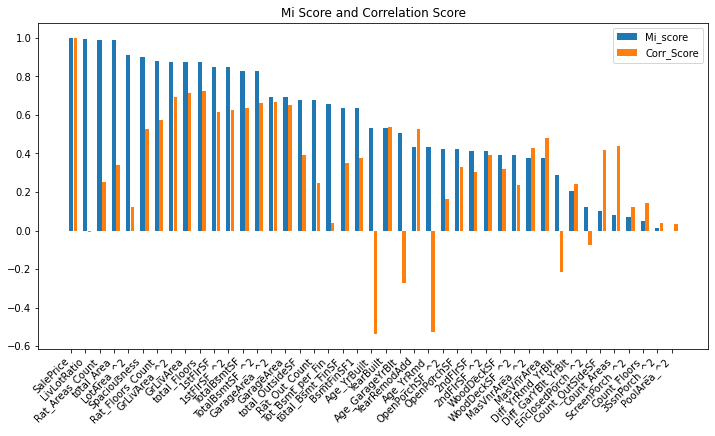

In [232]:
mi_score_corr = mi_score_and_corr_continous(df=data,cols=data.columns,target_col='SalePrice',fill_na=0)

In [233]:
mi_score_corr_sorted = mi_score_corr.sort_values(by='Corr_Score', key=lambda col: abs(col),ascending=False)# col.str.lower())
mi_score_corr_sorted

,mi_score,Corr_Score
SalePrice,6.107364,1.000000
total_Floors,5.357835,0.721580
GrLivArea,5.357844,0.711864
GrLivArea_^2,5.357844,0.693571
GarageArea_^2,4.232784,0.666274
TotalBsmtSF_^2,5.047586,0.660787
GarageArea,4.232784,0.652208
TotalBsmtSF,5.047586,0.633152
1stFlrSF_^2,5.197532,0.623348
1stFlrSF,5.197532,0.615553


<AxesSubplot:>

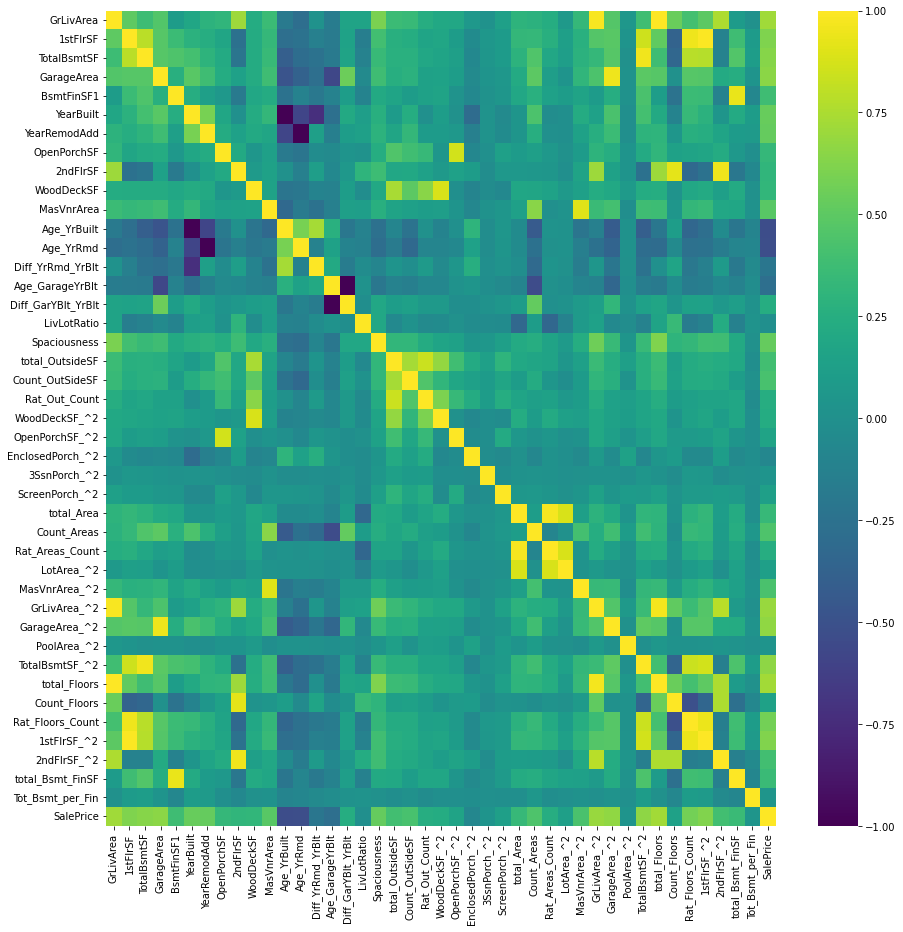

In [236]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),cmap='viridis')

In [246]:
data.corr()['GrLivArea']['SalePrice']

0.7118638665542879

In [266]:
def correlation(dataset,threshold,target_col):
    #with the ffling function we can select highly correlated features
    #it will remove the first feature that is correlated with anything other feature
    col_corr = set()
    corr_matrix = dataset[dataset.columns.drop(target_col)].corr()
    discard_list = set()
    #corr_with_target = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold: # we are interested in absolute coeff values
                colname = (corr_matrix.columns[i],corr_matrix.columns[j])
                #corr_with_target = (dataset[target_col].corrwith(dataset[corr_matrix.columns[i]]),
                #                    dataset[target_col].corrwith(dataset[corr_matrix.columns[j]]))
                
                print(colname)
                display(dataset.corr()[corr_matrix.columns[i]][corr_matrix.columns[j]])
                display(dataset[list(colname)].corrwith(dataset[target_col]))
                
                col_corr.add(colname)
                #for tpl in col_corr:
                    #tpl0_corr = data.corr()[tpl[0]][target_col]
                    #tpl1_corr = data.corr()[tpl[1]][target_col]
                    #min_corr = min([tpl0_corr,tpl1_corr])
                    #min_idx = [tpl0_corr,tpl1_corr].index(min_corr)
                    #discard_list.add((corr_matrix.columns[i],corr_matrix.columns[j],tpl[min_idx]))
    #display(discard_list)
                    
    return col_corr

In [267]:
correlation(dataset=data,threshold=0.7,target_col='SalePrice')

('TotalBsmtSF', '1stFlrSF')


0.7909904723638551

TotalBsmtSF    0.633152
1stFlrSF       0.615553
dtype: float64

('2ndFlrSF', 'GrLivArea')


0.7056570288400908

2ndFlrSF     0.305280
GrLivArea    0.711864
dtype: float64

('Age_YrBuilt', 'YearBuilt')


-0.9999999999999994

Age_YrBuilt   -0.538327
YearBuilt      0.538327
dtype: float64

('Age_YrRmd', 'YearRemodAdd')


-1.0

Age_YrRmd      -0.52806
YearRemodAdd    0.52806
dtype: float64

('Diff_YrRmd_YrBlt', 'YearBuilt')


-0.7337958431649636

Diff_YrRmd_YrBlt   -0.217049
YearBuilt           0.538327
dtype: float64

('Diff_YrRmd_YrBlt', 'Age_YrBuilt')


0.733795843164964

Diff_YrRmd_YrBlt   -0.217049
Age_YrBuilt        -0.538327
dtype: float64

('Diff_GarYBlt_YrBlt', 'Age_GarageYrBlt')


-0.9979111297427302

Diff_GarYBlt_YrBlt    0.241889
Age_GarageYrBlt      -0.273619
dtype: float64

('total_OutsideSF', 'WoodDeckSF')


0.7402298667787984

total_OutsideSF    0.391967
WoodDeckSF         0.320260
dtype: float64

('Count_OutSideSF', 'total_OutsideSF')


0.7307050877141853

Count_OutSideSF    0.415642
total_OutsideSF    0.391967
dtype: float64

('Rat_Out_Count', 'total_OutsideSF')


0.8410898629407426

Rat_Out_Count      0.244544
total_OutsideSF    0.391967
dtype: float64

('WoodDeckSF_^2', 'WoodDeckSF')


0.8813040762790764

WoodDeckSF_^2    0.234299
WoodDeckSF       0.320260
dtype: float64

('OpenPorchSF_^2', 'OpenPorchSF')


0.8594884763483184

OpenPorchSF_^2    0.163968
OpenPorchSF       0.332172
dtype: float64

('Rat_Areas_Count', 'total_Area')


0.9757247675040699

Rat_Areas_Count    0.249275
total_Area         0.340626
dtype: float64

('LotArea_^2', 'total_Area')


0.877247356702893

LotArea_^2    0.121666
total_Area    0.340626
dtype: float64

('LotArea_^2', 'Rat_Areas_Count')


0.8823014277175392

LotArea_^2         0.121666
Rat_Areas_Count    0.249275
dtype: float64

('MasVnrArea_^2', 'MasVnrArea')


0.9038740377987414

MasVnrArea_^2    0.427772
MasVnrArea       0.477597
dtype: float64

('GrLivArea_^2', 'GrLivArea')


0.9774436900485662

GrLivArea_^2    0.693571
GrLivArea       0.711864
dtype: float64

('GrLivArea_^2', '2ndFlrSF')


0.7042789780505164

GrLivArea_^2    0.693571
2ndFlrSF        0.305280
dtype: float64

('GarageArea_^2', 'GarageArea')


0.9463816090540703

GarageArea_^2    0.666274
GarageArea       0.652208
dtype: float64

('TotalBsmtSF_^2', '1stFlrSF')


0.8509073960327058

TotalBsmtSF_^2    0.660787
1stFlrSF          0.615553
dtype: float64

('TotalBsmtSF_^2', 'TotalBsmtSF')


0.9603802409216582

TotalBsmtSF_^2    0.660787
TotalBsmtSF       0.633152
dtype: float64

('total_Floors', 'GrLivArea')


0.9949366881806936

total_Floors    0.721580
GrLivArea       0.711864
dtype: float64

('total_Floors', '2ndFlrSF')


0.7062151331406948

total_Floors    0.72158
2ndFlrSF        0.30528
dtype: float64

('total_Floors', 'GrLivArea_^2')


0.9680487403821895

total_Floors    0.721580
GrLivArea_^2    0.693571
dtype: float64

('Count_Floors', '2ndFlrSF')


0.9167430958654457

Count_Floors    0.14368
2ndFlrSF        0.30528
dtype: float64

('Rat_Floors_Count', '1stFlrSF')


0.9512006637861613

Rat_Floors_Count    0.571335
1stFlrSF            0.615553
dtype: float64

('Rat_Floors_Count', 'TotalBsmtSF')


0.7856547771357333

Rat_Floors_Count    0.571335
TotalBsmtSF         0.633152
dtype: float64

('Rat_Floors_Count', 'TotalBsmtSF_^2')


0.8427955440712402

Rat_Floors_Count    0.571335
TotalBsmtSF_^2      0.660787
dtype: float64

('1stFlrSF_^2', '1stFlrSF')


0.9850721662542706

1stFlrSF_^2    0.623348
1stFlrSF       0.615553
dtype: float64

('1stFlrSF_^2', 'TotalBsmtSF')


0.7802198556736499

1stFlrSF_^2    0.623348
TotalBsmtSF    0.633152
dtype: float64

('1stFlrSF_^2', 'TotalBsmtSF_^2')


0.8642266563235446

1stFlrSF_^2       0.623348
TotalBsmtSF_^2    0.660787
dtype: float64

('1stFlrSF_^2', 'Rat_Floors_Count')


0.9406977658823238

1stFlrSF_^2         0.623348
Rat_Floors_Count    0.571335
dtype: float64

('2ndFlrSF_^2', 'GrLivArea')


0.7530530482730896

2ndFlrSF_^2    0.391781
GrLivArea      0.711864
dtype: float64

('2ndFlrSF_^2', '2ndFlrSF')


0.9476373251568269

2ndFlrSF_^2    0.391781
2ndFlrSF       0.305280
dtype: float64

('2ndFlrSF_^2', 'GrLivArea_^2')


0.7858591768279132

2ndFlrSF_^2     0.391781
GrLivArea_^2    0.693571
dtype: float64

('2ndFlrSF_^2', 'total_Floors')


0.751453468917816

2ndFlrSF_^2     0.391781
total_Floors    0.721580
dtype: float64

('2ndFlrSF_^2', 'Count_Floors')


0.7550306376823521

2ndFlrSF_^2     0.391781
Count_Floors    0.143680
dtype: float64

('total_Bsmt_FinSF', 'BsmtFinSF1')


0.9317314448159139

total_Bsmt_FinSF    0.351798
BsmtFinSF1          0.376442
dtype: float64

{('1stFlrSF_^2', '1stFlrSF'),
 ('1stFlrSF_^2', 'Rat_Floors_Count'),
 ('1stFlrSF_^2', 'TotalBsmtSF'),
 ('1stFlrSF_^2', 'TotalBsmtSF_^2'),
 ('2ndFlrSF', 'GrLivArea'),
 ('2ndFlrSF_^2', '2ndFlrSF'),
 ('2ndFlrSF_^2', 'Count_Floors'),
 ('2ndFlrSF_^2', 'GrLivArea'),
 ('2ndFlrSF_^2', 'GrLivArea_^2'),
 ('2ndFlrSF_^2', 'total_Floors'),
 ('Age_YrBuilt', 'YearBuilt'),
 ('Age_YrRmd', 'YearRemodAdd'),
 ('Count_Floors', '2ndFlrSF'),
 ('Count_OutSideSF', 'total_OutsideSF'),
 ('Diff_GarYBlt_YrBlt', 'Age_GarageYrBlt'),
 ('Diff_YrRmd_YrBlt', 'Age_YrBuilt'),
 ('Diff_YrRmd_YrBlt', 'YearBuilt'),
 ('GarageArea_^2', 'GarageArea'),
 ('GrLivArea_^2', '2ndFlrSF'),
 ('GrLivArea_^2', 'GrLivArea'),
 ('LotArea_^2', 'Rat_Areas_Count'),
 ('LotArea_^2', 'total_Area'),
 ('MasVnrArea_^2', 'MasVnrArea'),
 ('OpenPorchSF_^2', 'OpenPorchSF'),
 ('Rat_Areas_Count', 'total_Area'),
 ('Rat_Floors_Count', '1stFlrSF'),
 ('Rat_Floors_Count', 'TotalBsmtSF'),
 ('Rat_Floors_Count', 'TotalBsmtSF_^2'),
 ('Rat_Out_Count', 'total_OutsideSF

In [259]:
correlation(dataset=data,threshold=0.8,target_col='SalePrice')

{('1stFlrSF_^2', '1stFlrSF', '1stFlrSF'),
 ('1stFlrSF_^2', '1stFlrSF', 'Age_GarageYrBlt'),
 ('1stFlrSF_^2', '1stFlrSF', 'Age_YrBuilt'),
 ('1stFlrSF_^2', '1stFlrSF', 'Age_YrRmd'),
 ('1stFlrSF_^2', '1stFlrSF', 'Count_Floors'),
 ('1stFlrSF_^2', '1stFlrSF', 'GarageArea'),
 ('1stFlrSF_^2', '1stFlrSF', 'GrLivArea'),
 ('1stFlrSF_^2', '1stFlrSF', 'GrLivArea_^2'),
 ('1stFlrSF_^2', '1stFlrSF', 'LotArea_^2'),
 ('1stFlrSF_^2', '1stFlrSF', 'MasVnrArea_^2'),
 ('1stFlrSF_^2', '1stFlrSF', 'OpenPorchSF_^2'),
 ('1stFlrSF_^2', '1stFlrSF', 'Rat_Areas_Count'),
 ('1stFlrSF_^2', '1stFlrSF', 'Rat_Floors_Count'),
 ('1stFlrSF_^2', '1stFlrSF', 'Rat_Out_Count'),
 ('1stFlrSF_^2', '1stFlrSF', 'TotalBsmtSF'),
 ('1stFlrSF_^2', '1stFlrSF', 'WoodDeckSF_^2'),
 ('1stFlrSF_^2', 'Rat_Floors_Count', '1stFlrSF'),
 ('1stFlrSF_^2', 'Rat_Floors_Count', '1stFlrSF_^2'),
 ('1stFlrSF_^2', 'Rat_Floors_Count', 'Age_GarageYrBlt'),
 ('1stFlrSF_^2', 'Rat_Floors_Count', 'Age_YrBuilt'),
 ('1stFlrSF_^2', 'Rat_Floors_Count', 'Age_YrRmd'),
 